In [175]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix



Loading data

In [100]:
df=pd.read_csv("../Data/BankChurners.csv")

In [101]:
df = df.iloc[:,1:-2]
df.shape

(10127, 20)

In [102]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [142]:
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [104]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [105]:
# Check for NaN values in each column
nan_values_per_column = df.isna().sum()
print(nan_values_per_column)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [106]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []


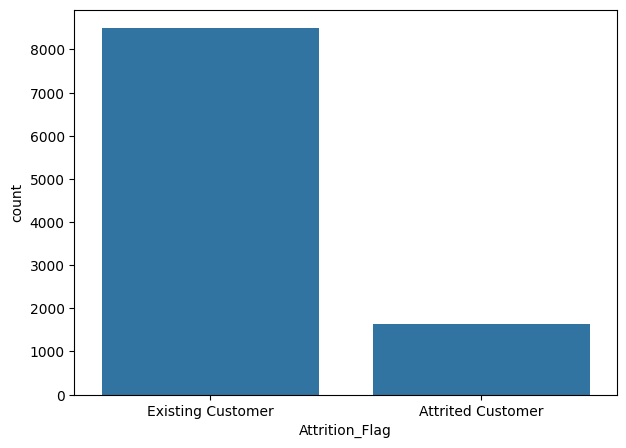

In [107]:
plt.figure(figsize = (7,5))
sns.countplot(x = df['Attrition_Flag'])
plt.show()

Attrition flag has to be upsampled

Analysis on customer_age

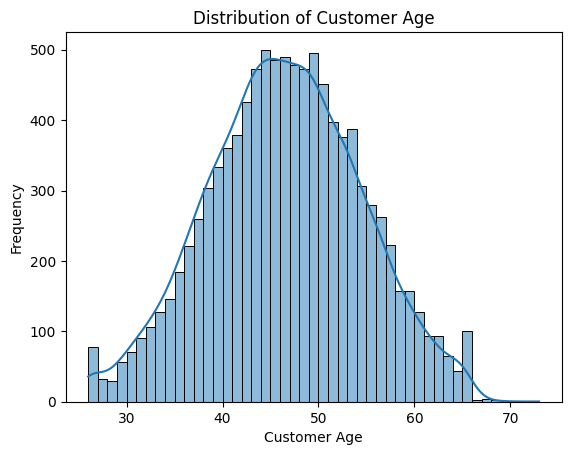

In [108]:
sns.histplot(df['Customer_Age'], kde=True)

# Customize the plot
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

analysis on Gender

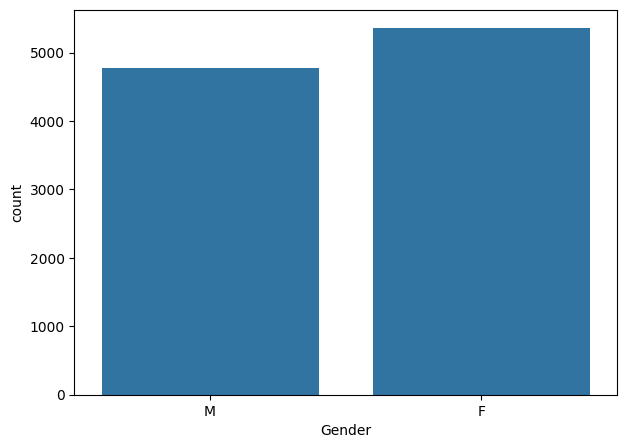

In [109]:
plt.figure(figsize = (7,5))
sns.countplot(x = df['Gender'])
plt.show()

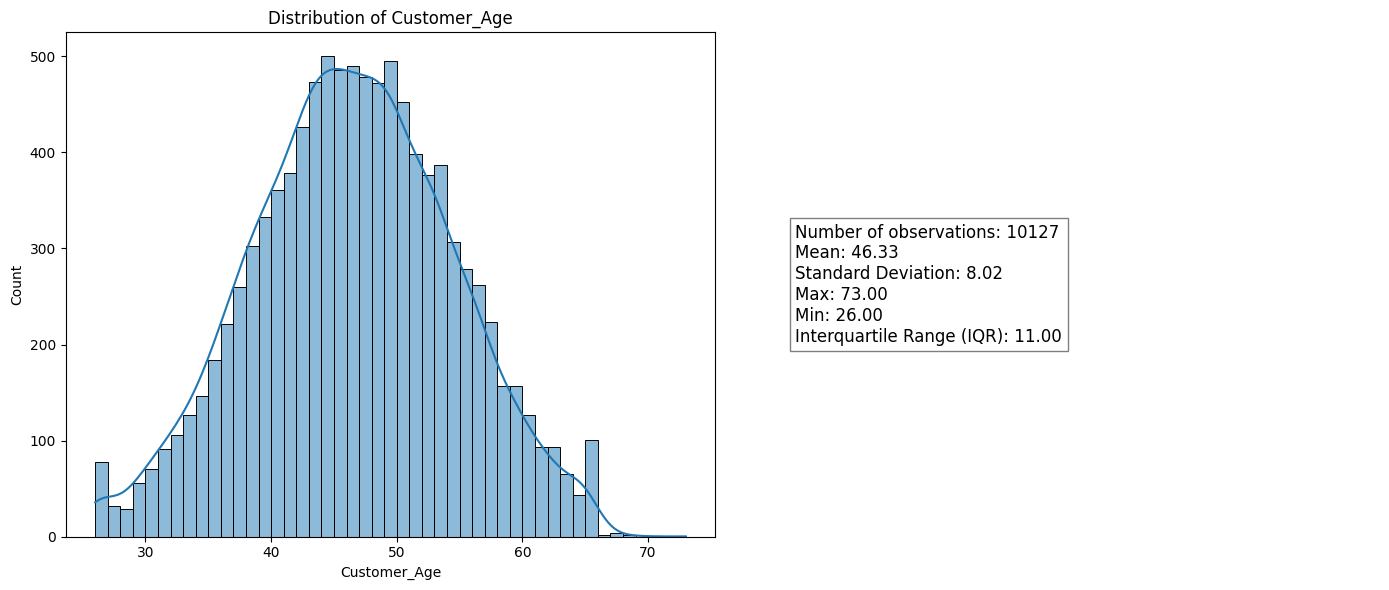

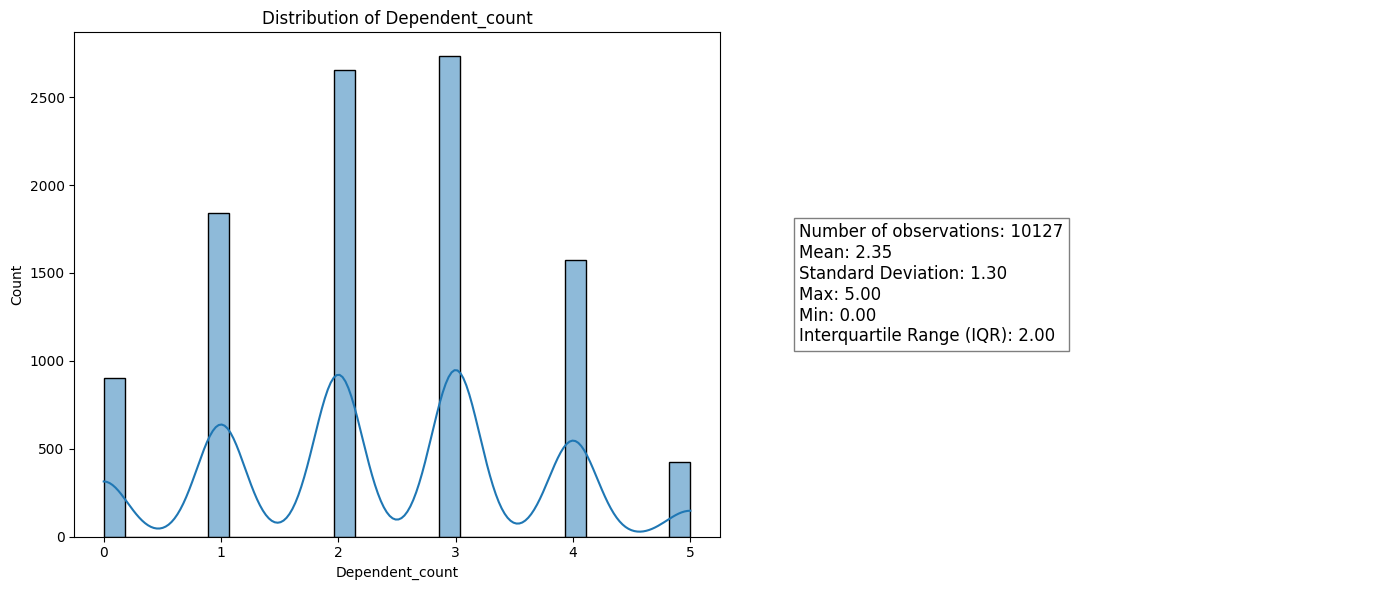

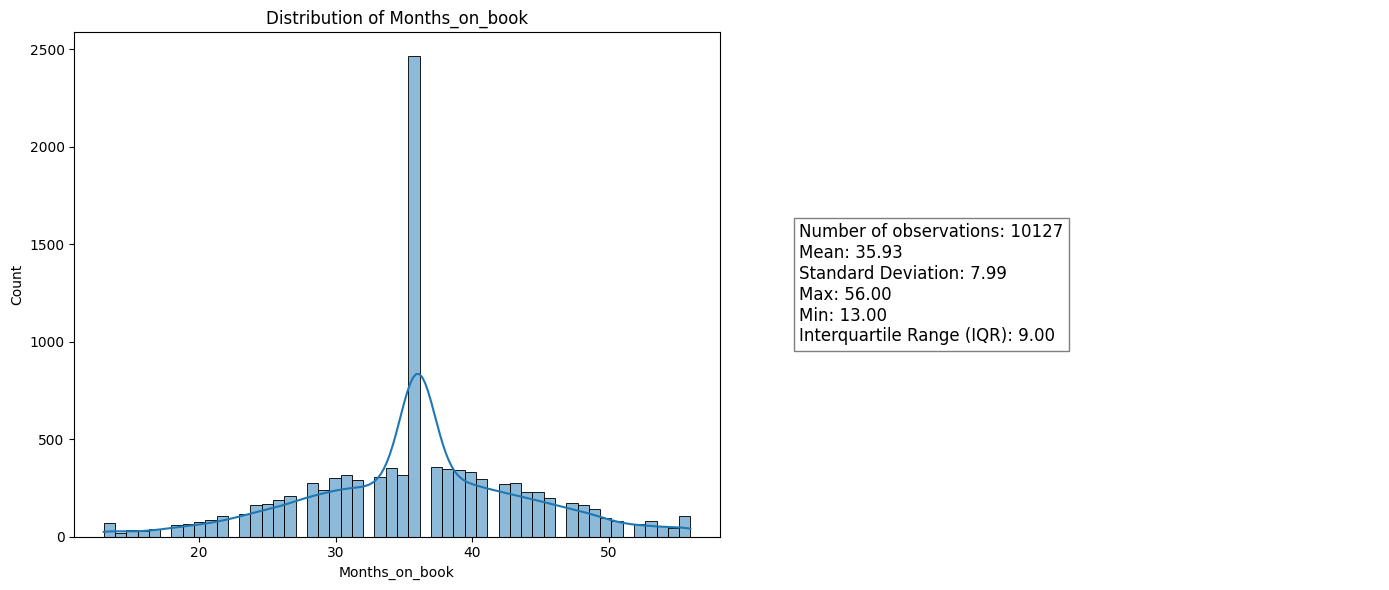

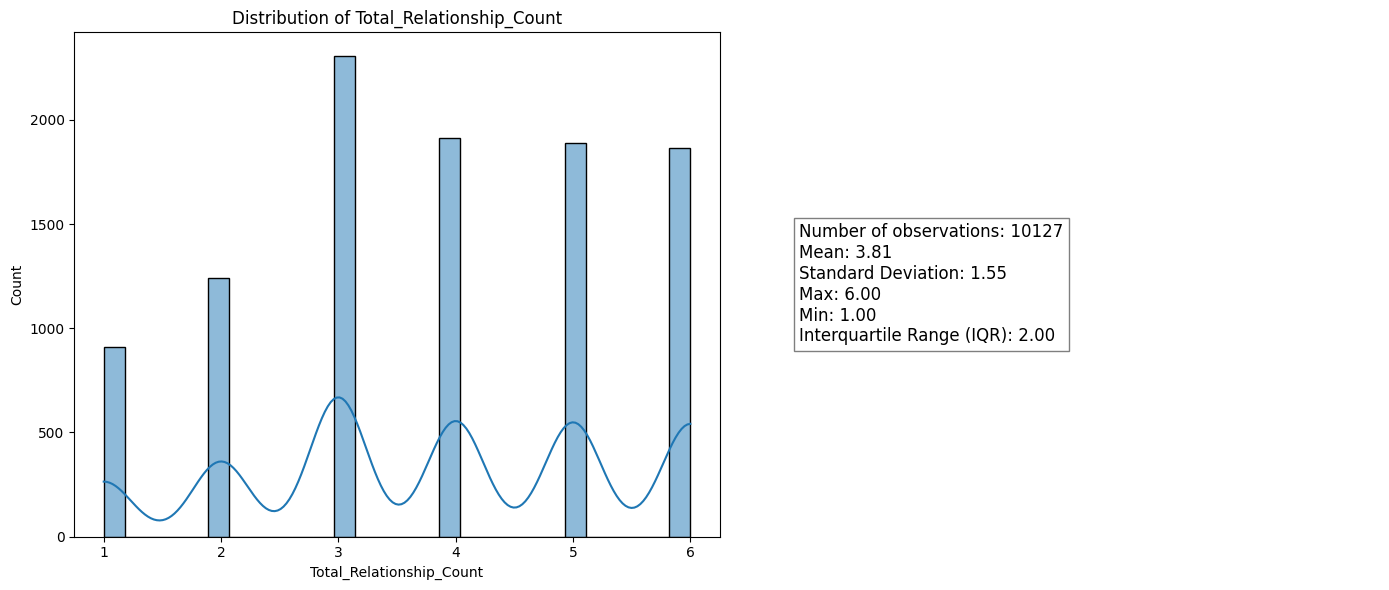

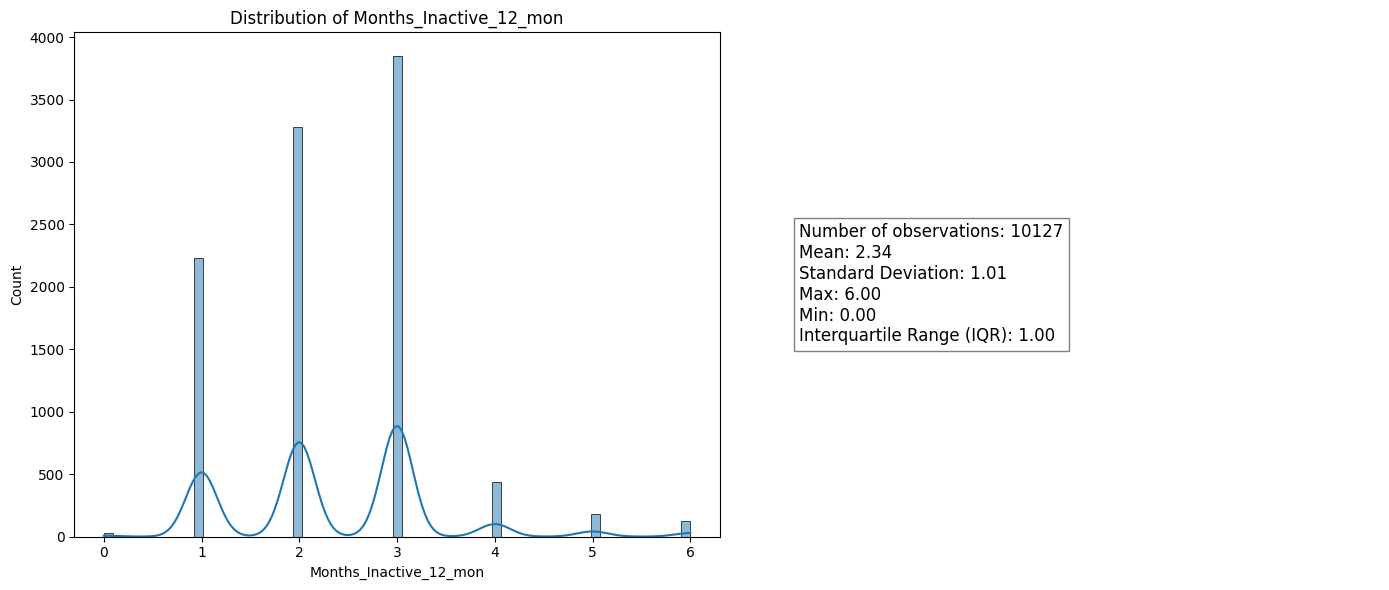

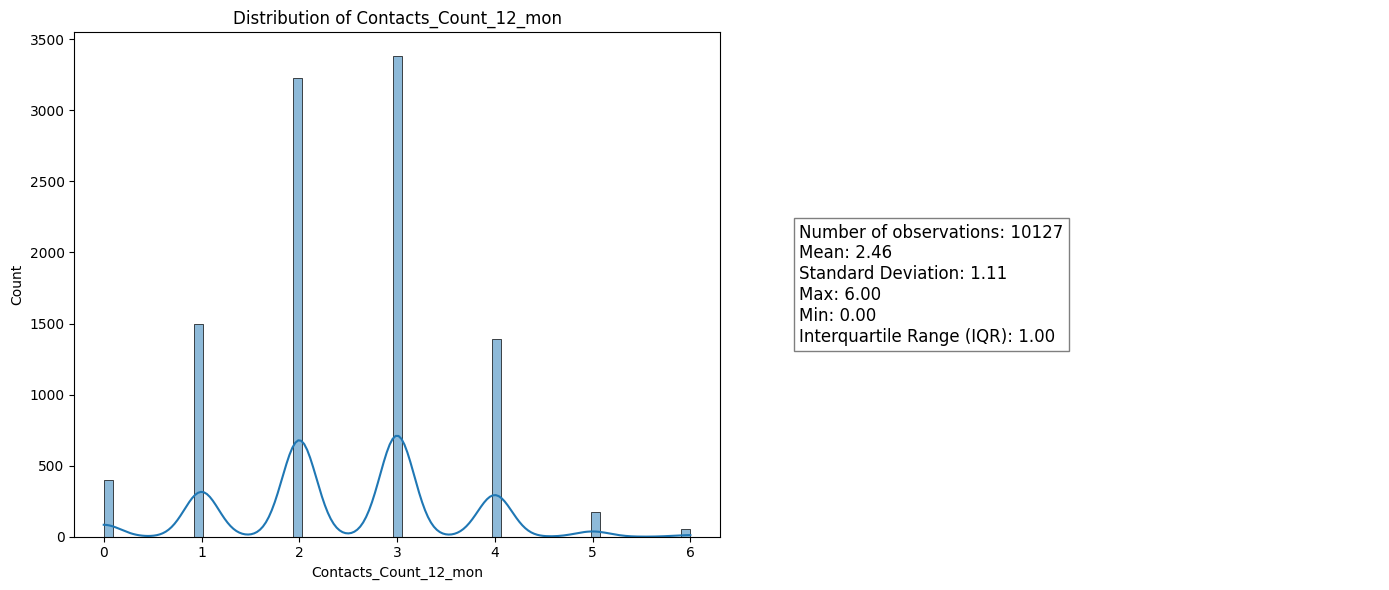

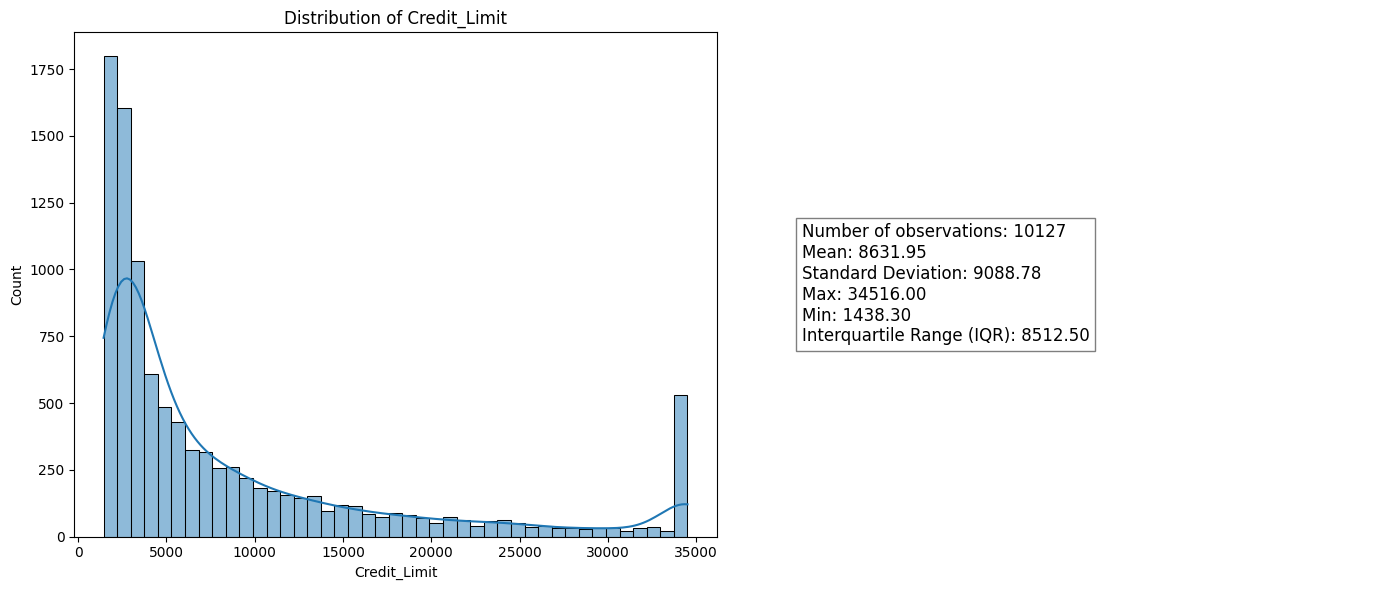

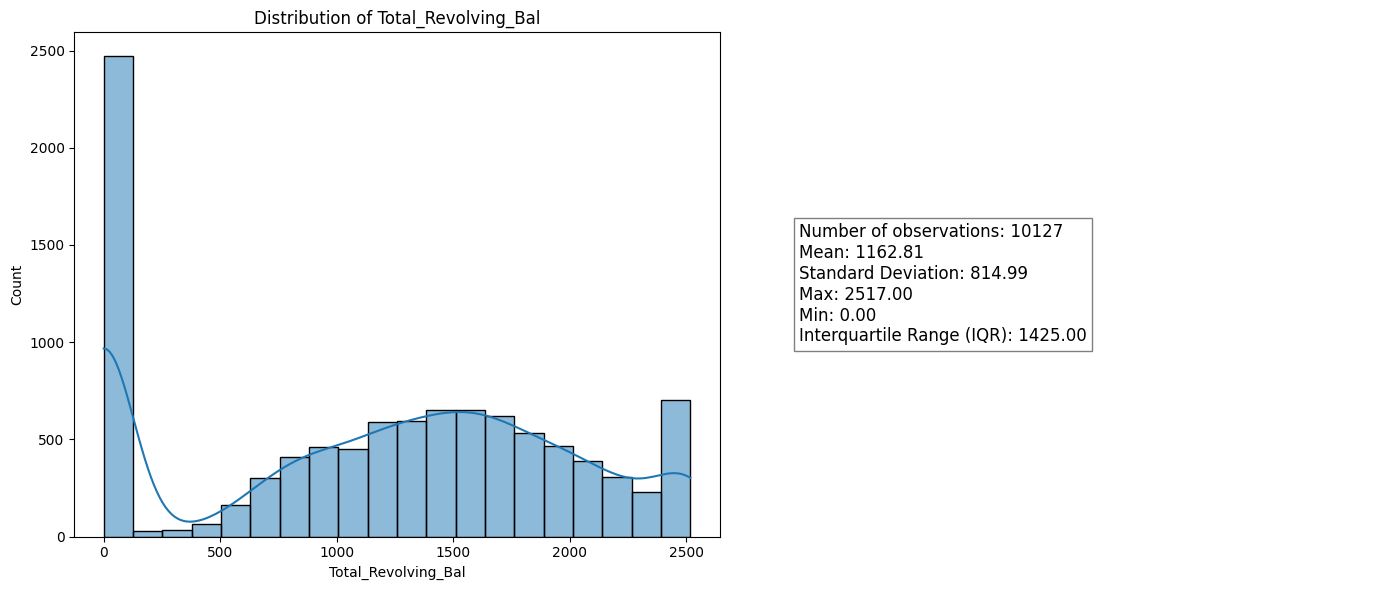

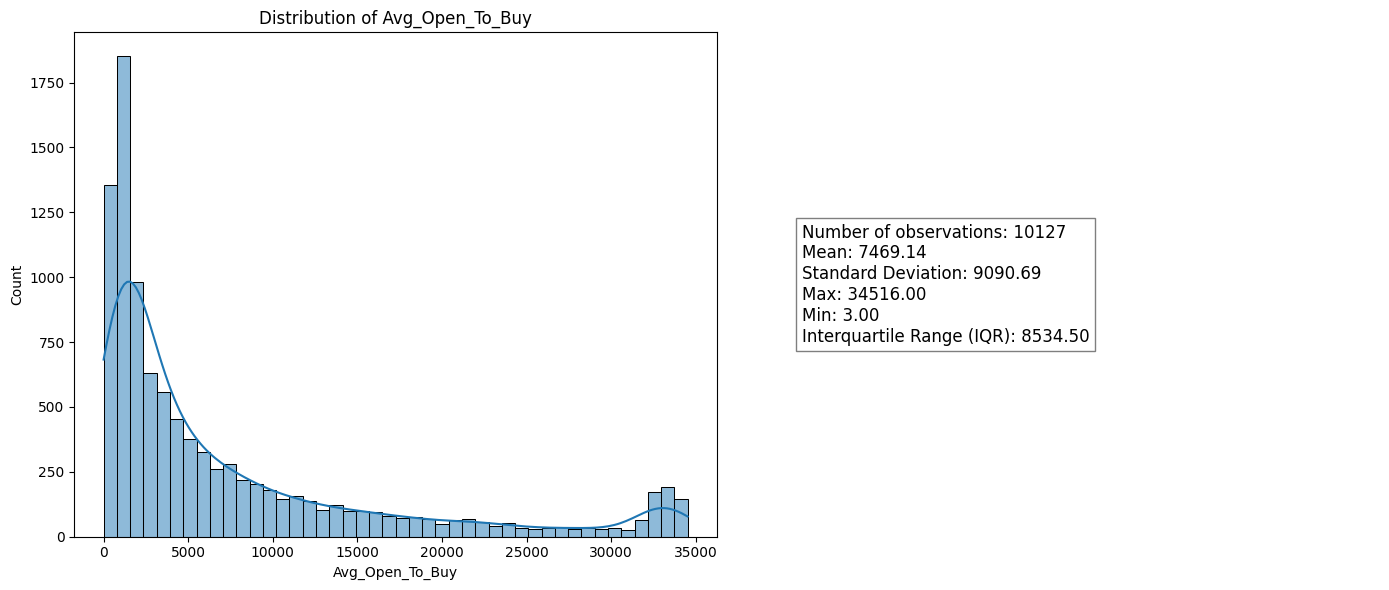

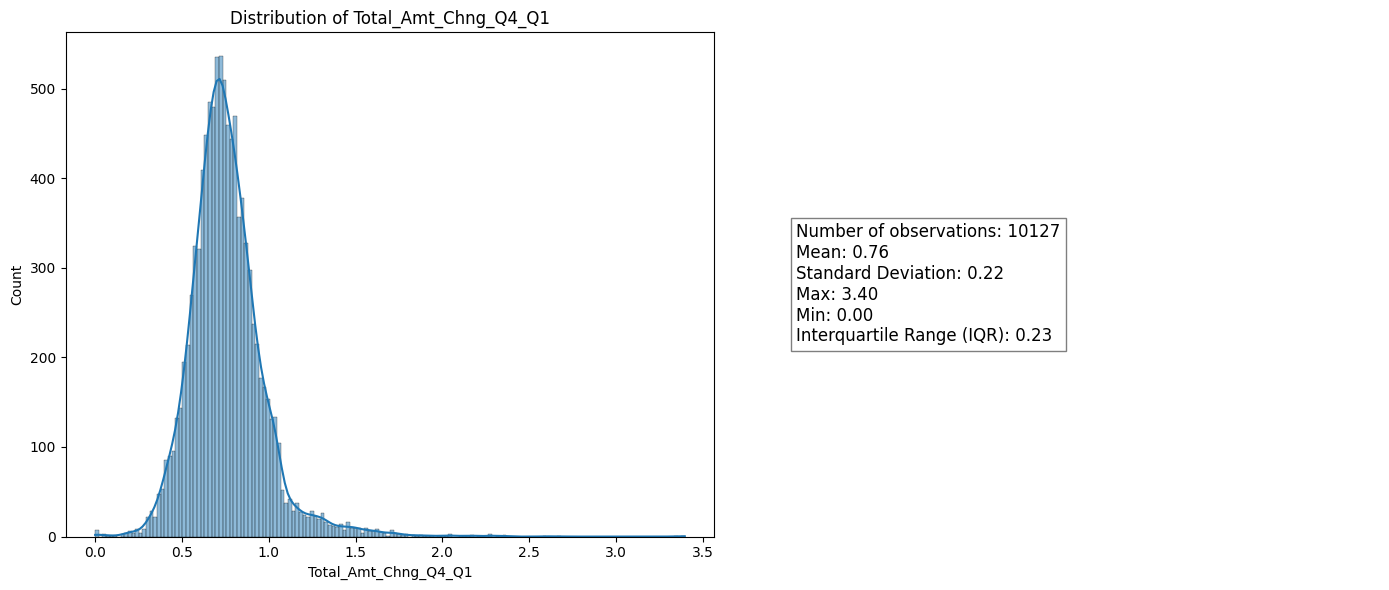

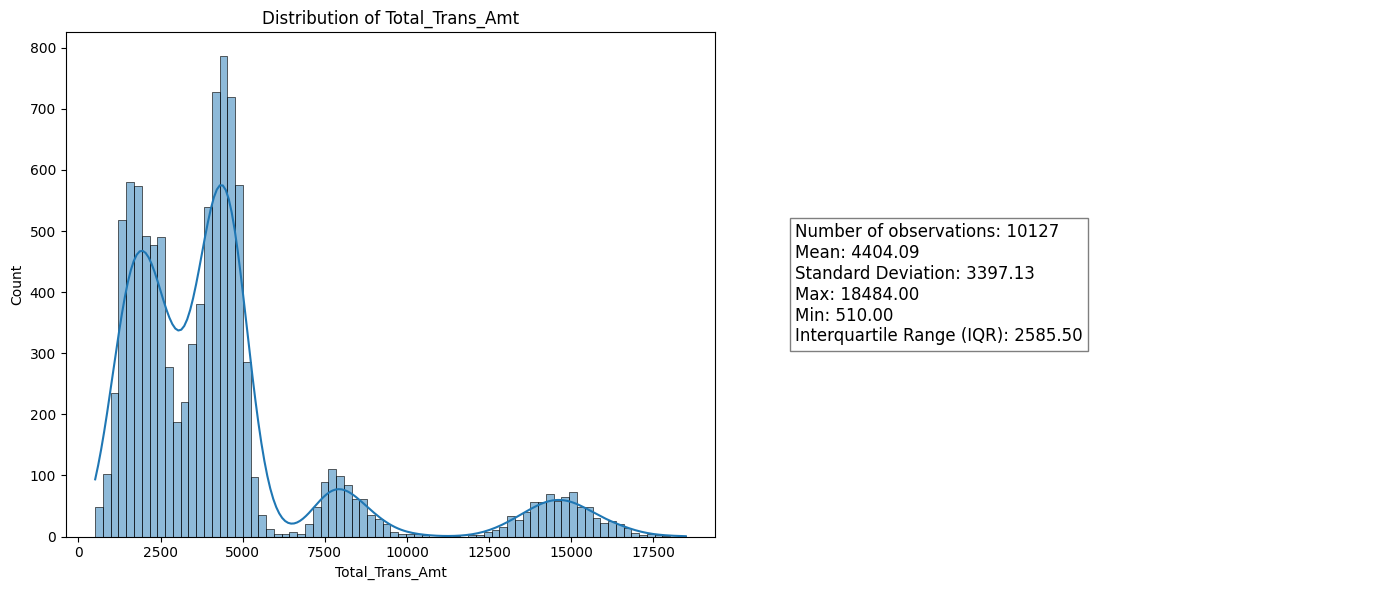

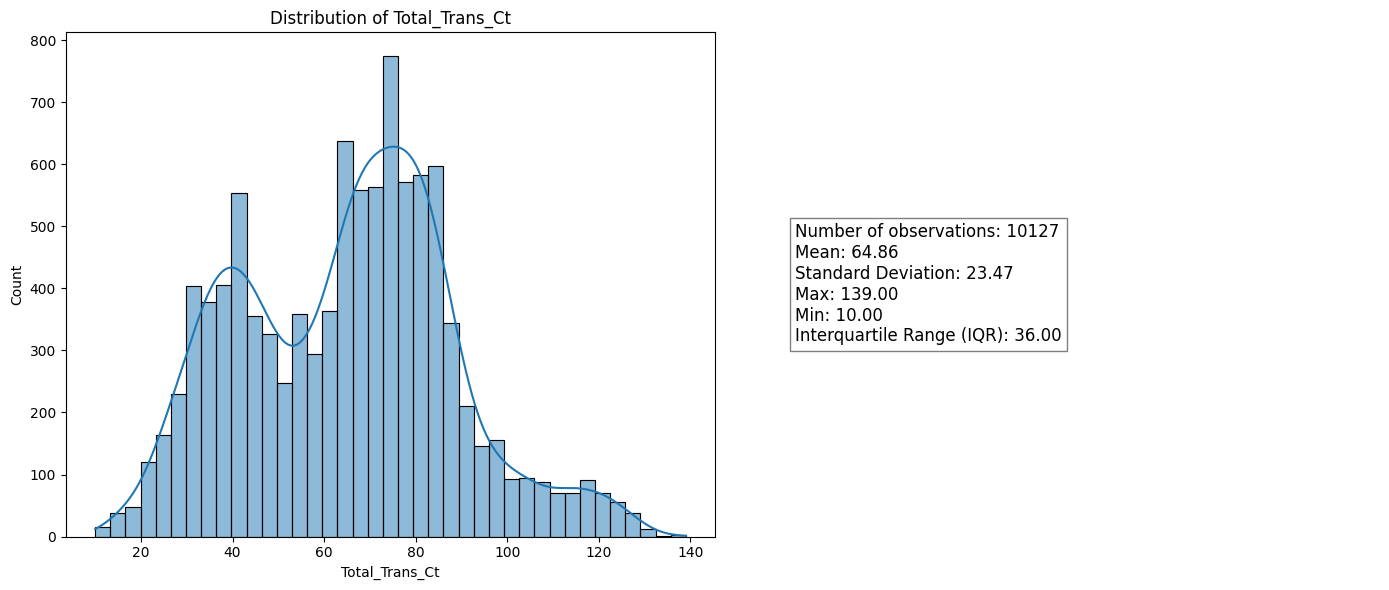

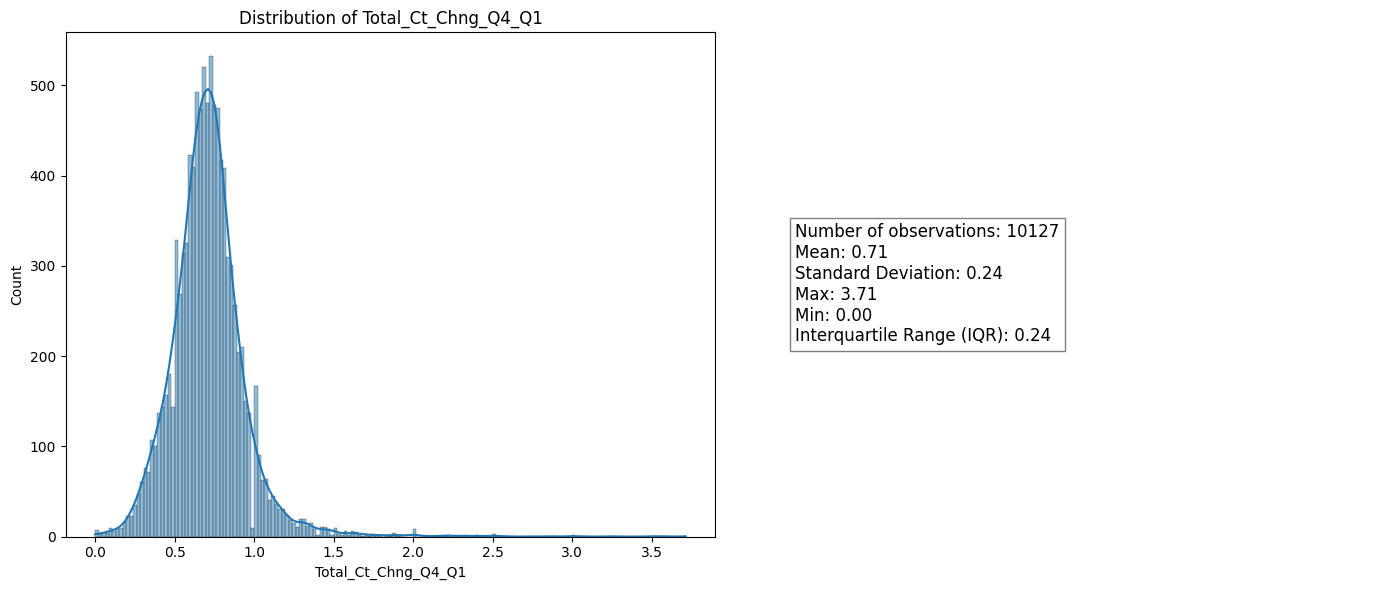

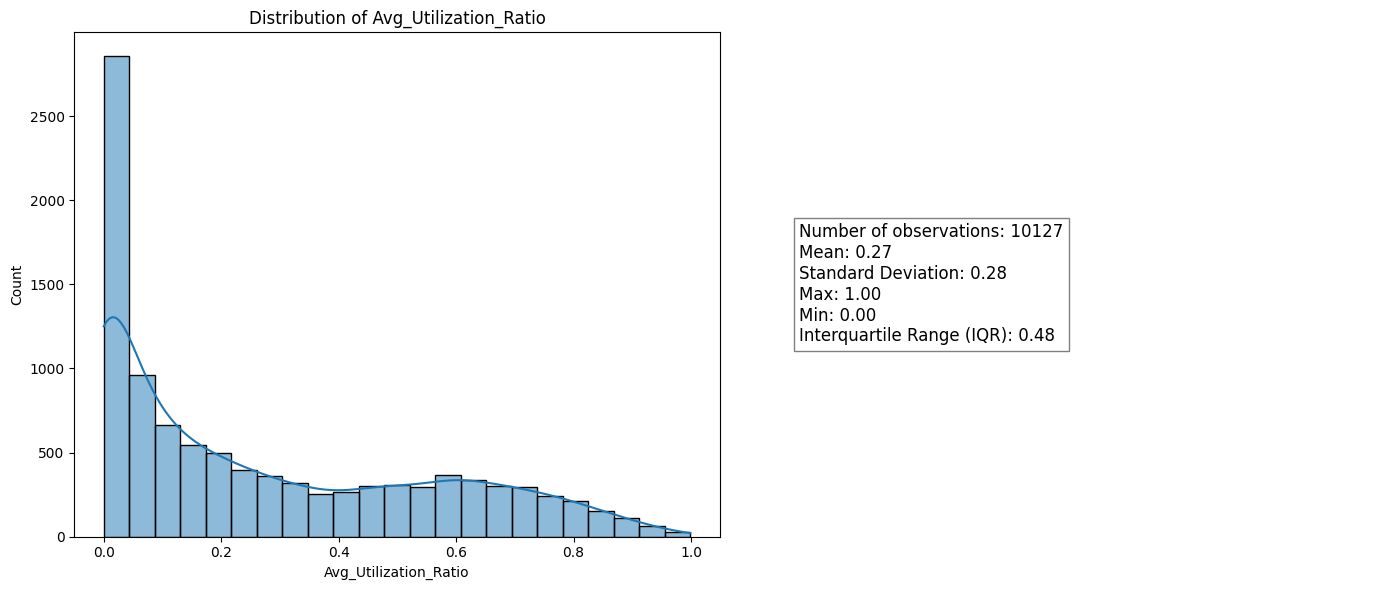

In [110]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(14, 6))

    # Plotting histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Calculate and display statistics
    stats = df[feature].describe()
    iqr = stats['75%'] - stats['25%']
    textstr = '\n'.join((
        f'Number of observations: {stats["count"]:.0f}',
        f'Mean: {stats["mean"]:.2f}',
        f'Standard Deviation: {stats["std"]:.2f}',
        f'Max: {stats["max"]:.2f}',
        f'Min: {stats["min"]:.2f}',
        f'Interquartile Range (IQR): {iqr:.2f}'
    ))

    # Display text box with statistics
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.text(0.1, 0.5, textstr, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()


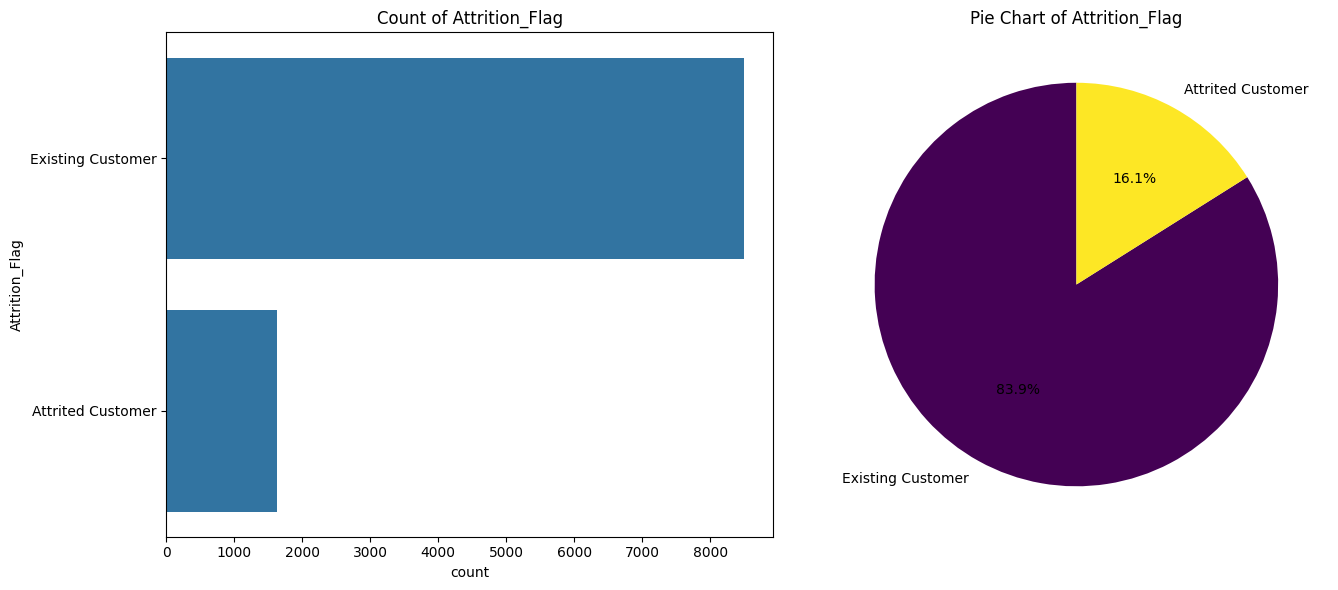

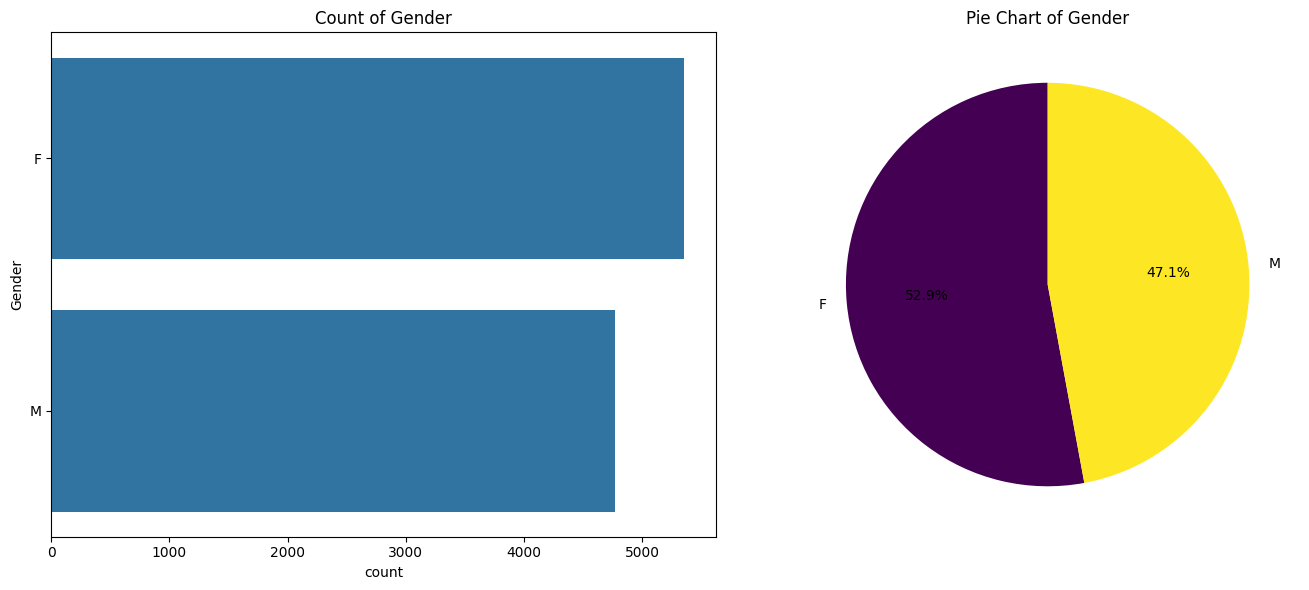

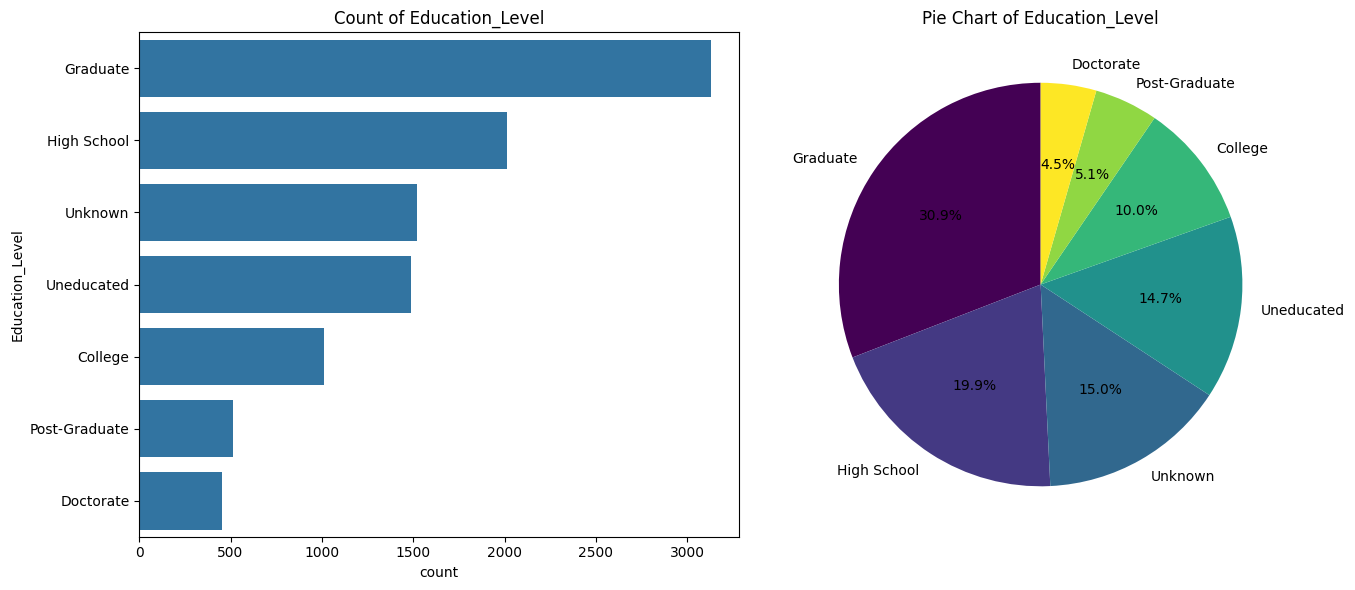

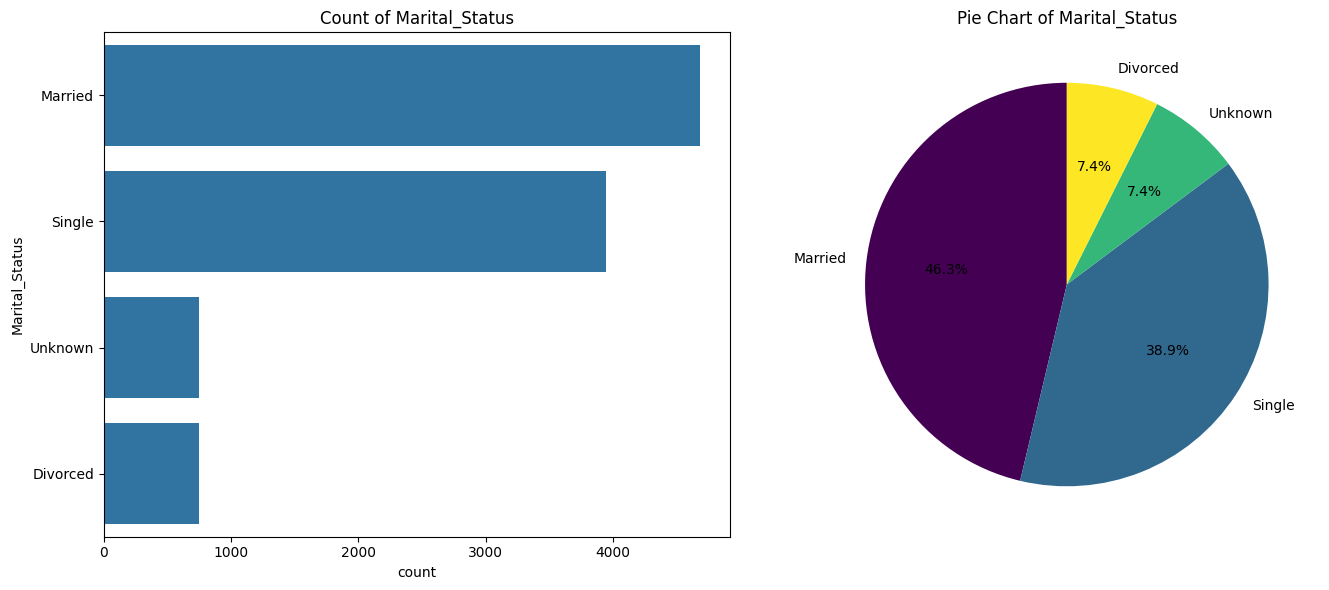

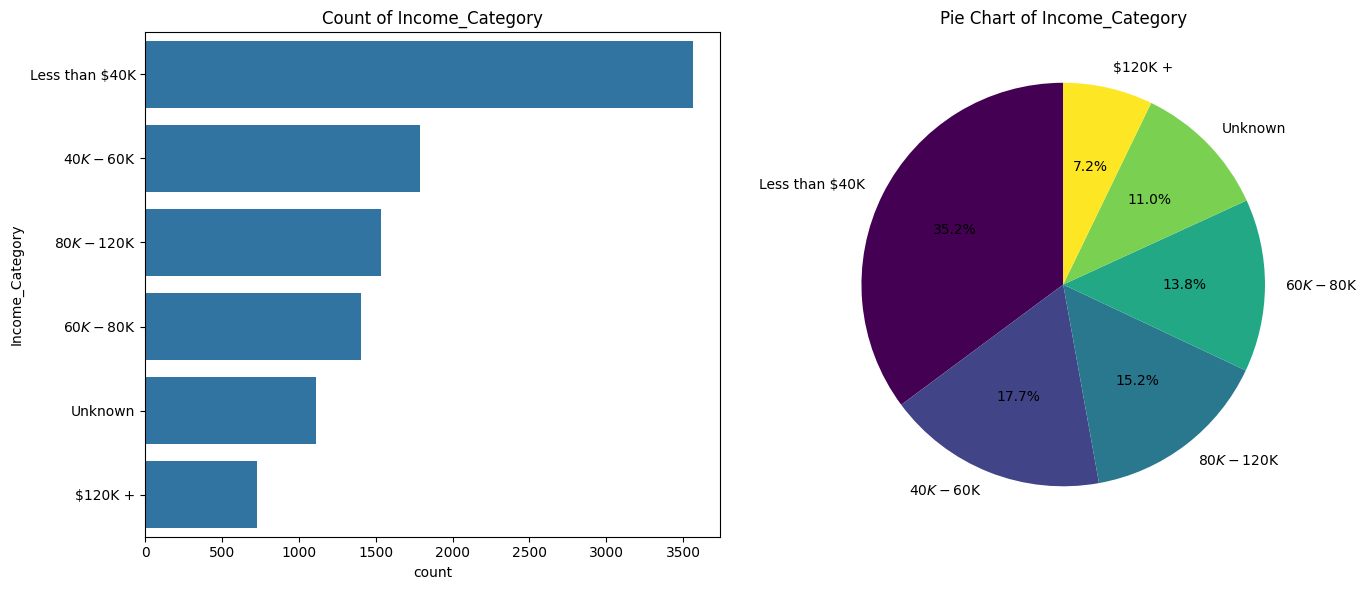

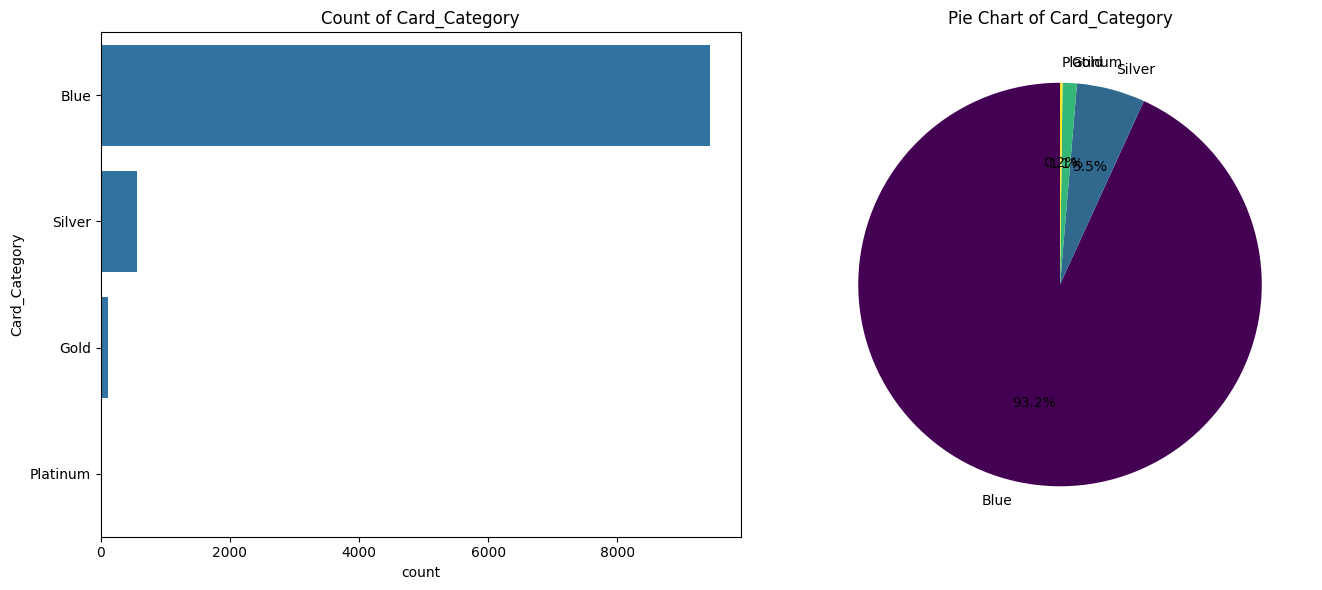

In [111]:

# Plotting counts and pie charts of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(14, 6))

    # Plotting countplot
    plt.subplot(1, 2, 1)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')

    # Plotting pie chart
    plt.subplot(1, 2, 2)
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Pie Chart of {feature}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

In [112]:
df[numerical_features]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [113]:
from scipy import stats

print("Outliers detected using Z-score method:")
for feature in numerical_features:
    z_scores = stats.zscore(df[feature])
    outliers = df[np.abs(z_scores) > 3]
    if not outliers.empty:
        print(f"{feature}: {len(outliers)} outliers")


Outliers detected using Z-score method:
Customer_Age: 1 outliers
Months_Inactive_12_mon: 124 outliers
Contacts_Count_12_mon: 54 outliers
Total_Amt_Chng_Q4_Q1: 163 outliers
Total_Trans_Amt: 391 outliers
Total_Trans_Ct: 2 outliers
Total_Ct_Chng_Q4_Q1: 113 outliers


In [114]:
z_scores = np.abs(stats.zscore(df[numerical_features]))
filtered_entries = (z_scores < 3).all(axis=1)
df_filtered = df[filtered_entries]

In [115]:
df_filtered.shape

(9313, 20)

In [116]:
df_filtered

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
20,Existing Customer,47,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,5,2,0,20979.0,1800,19179.0,0.906,1178,27,0.929,0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


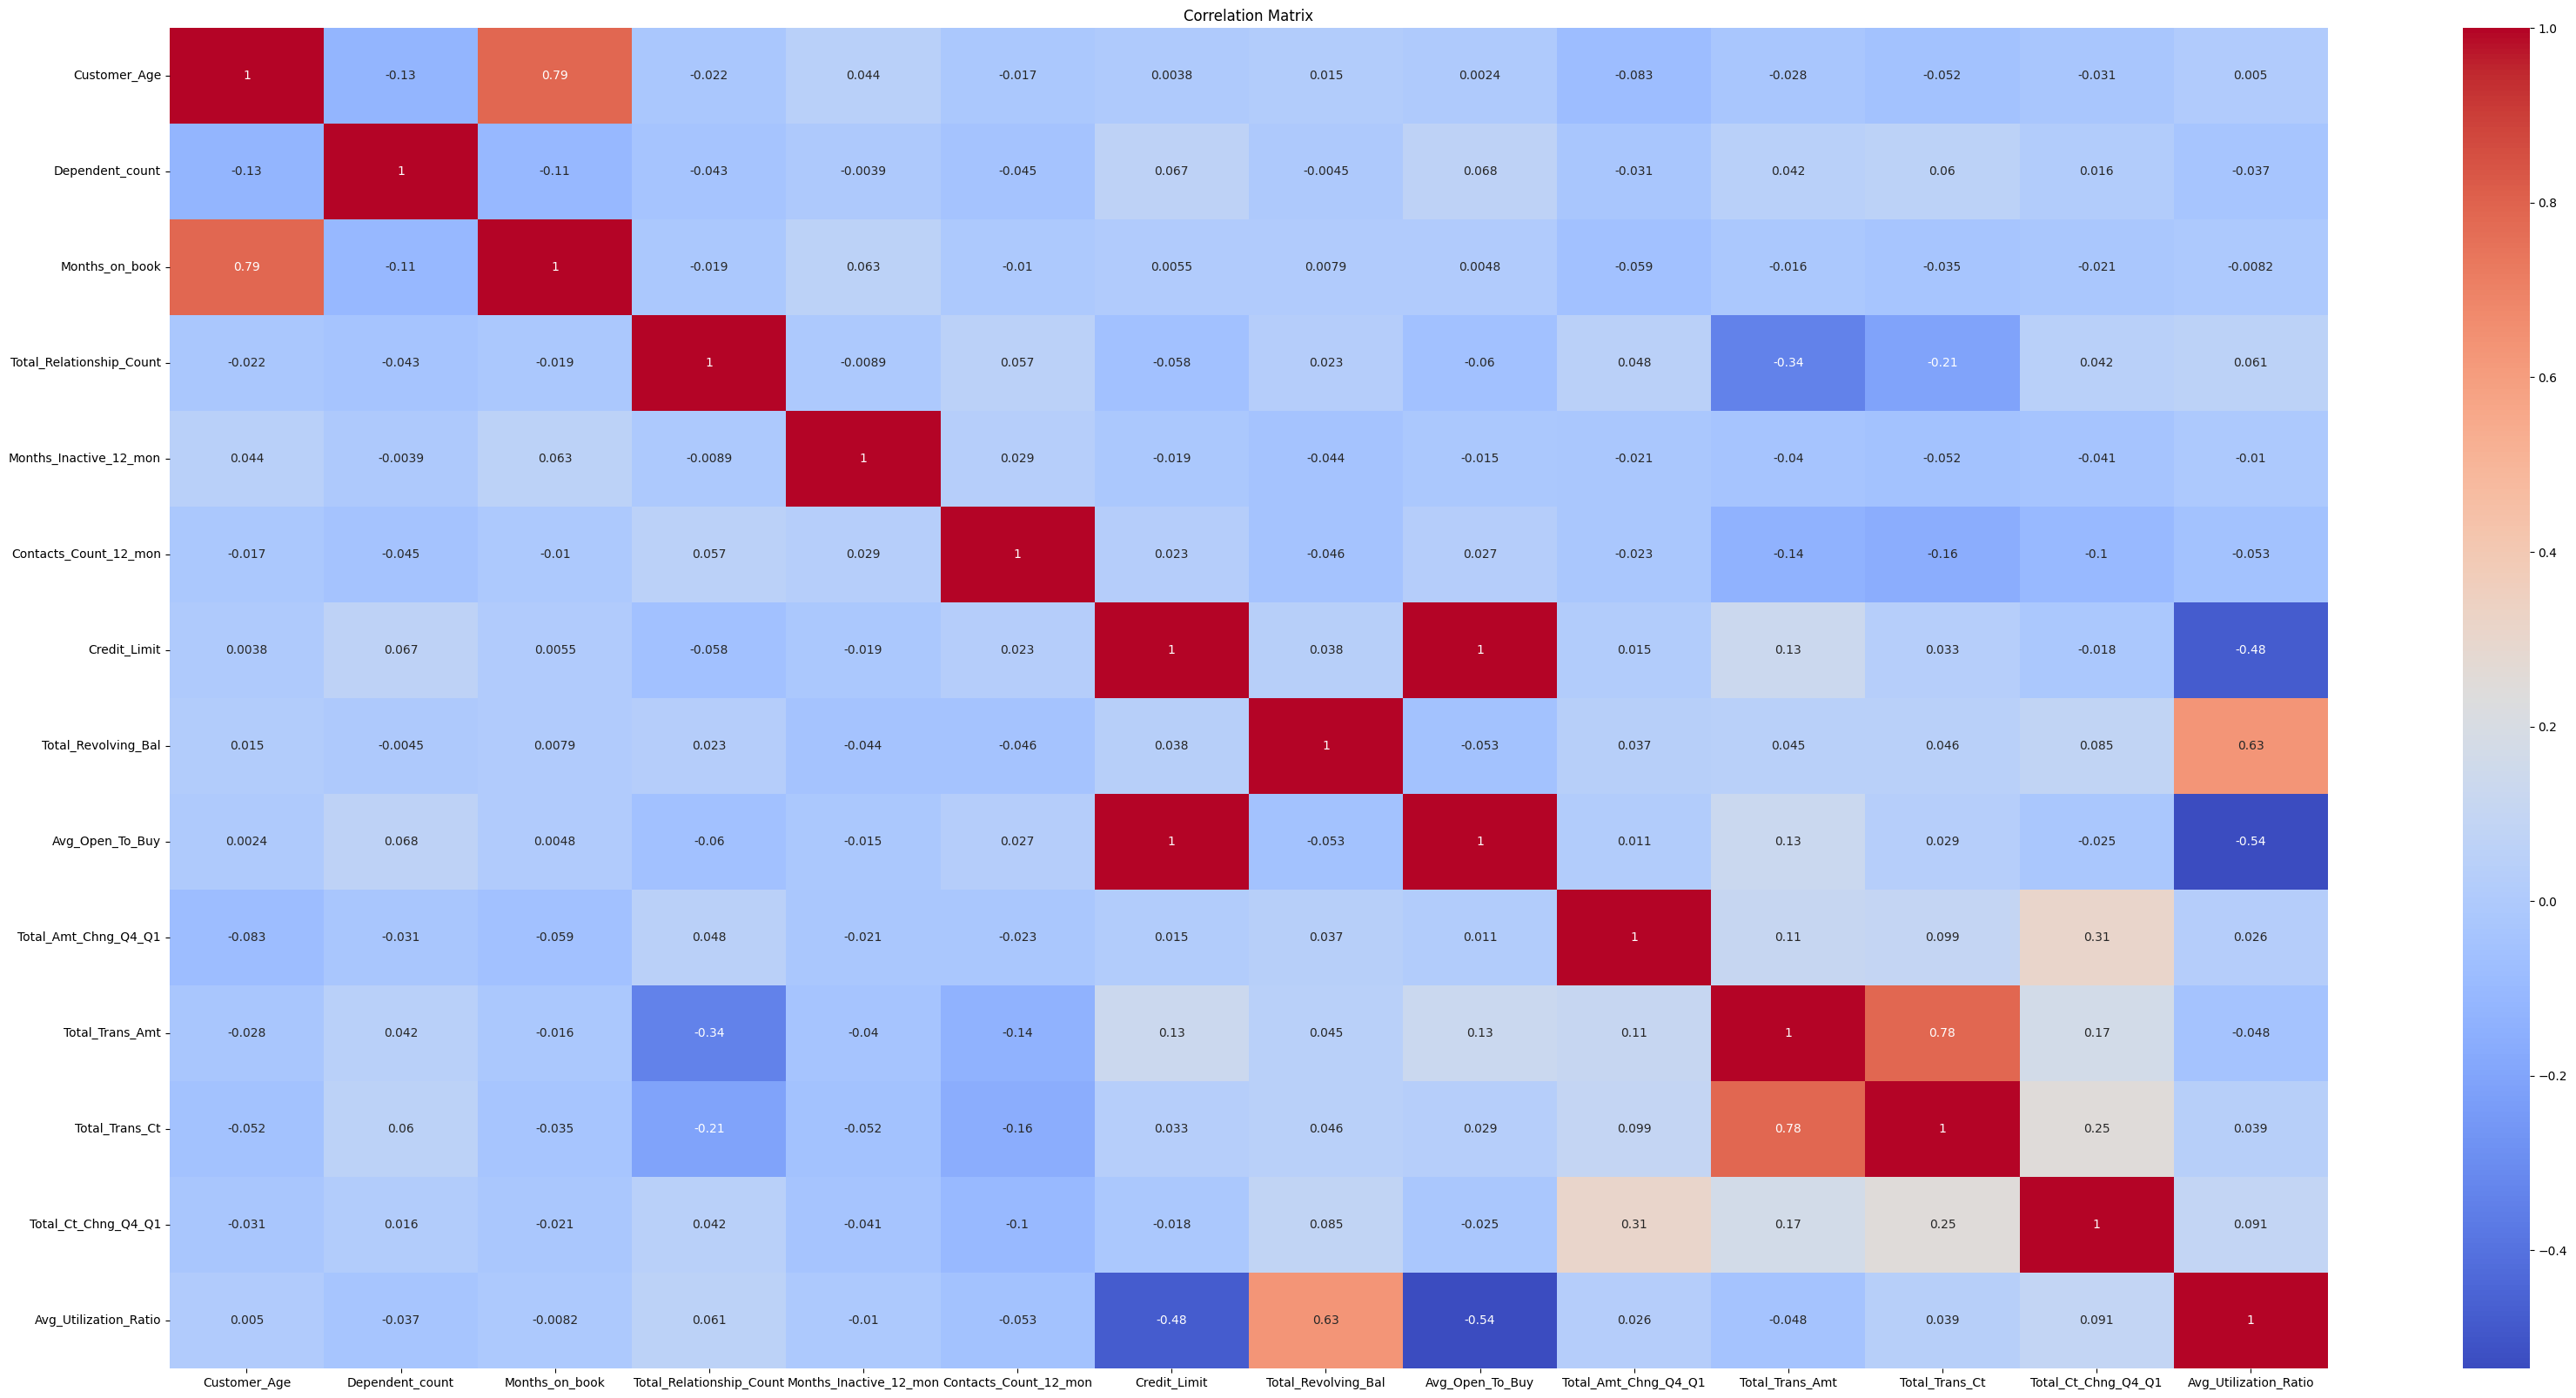

In [117]:
plt.figure(figsize=(40, 20))
correlation_matrix = df_filtered[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [118]:
df_filtered = df_filtered.drop(columns=['Avg_Open_To_Buy'])
numerical_features = numerical_features.drop('Avg_Open_To_Buy')

In [119]:
one_hot_cols = [
    "Gender", 
    "Education_Level", 
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Attrition_Flag",
]

standard_cols = [
    "Customer_Age", 
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Months_on_book",
    "Total_Revolving_Bal",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
]

In [120]:
preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
    ]
)


In [121]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df_filtered),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9313 entries, 0 to 9312
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   one-hot__Gender_F                          9313 non-null   float64
 1   one-hot__Gender_M                          9313 non-null   float64
 2   one-hot__Education_Level_College           9313 non-null   float64
 3   one-hot__Education_Level_Doctorate         9313 non-null   float64
 4   one-hot__Education_Level_Graduate          9313 non-null   float64
 5   one-hot__Education_Level_High School       9313 non-null   float64
 6   one-hot__Education_Level_Post-Graduate     9313 non-null   float64
 7   one-hot__Education_Level_Uneducated        9313 non-null   float64
 8   one-hot__Education_Level_Unknown           9313 non-null   float64
 9   one-hot__Marital_Status_Divorced           9313 non-null   float64
 10  one-hot__Marital_Status_

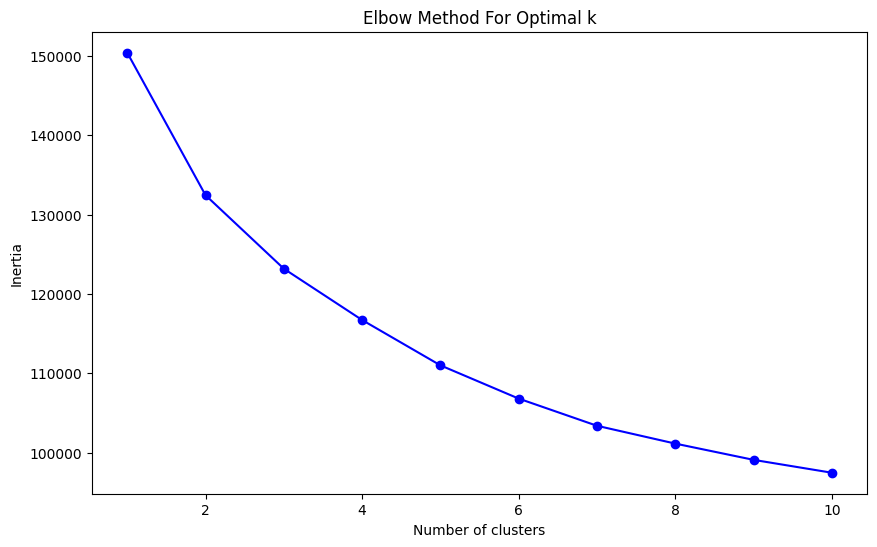

In [122]:
# Elbow Method for finding the optimal number of clusters
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

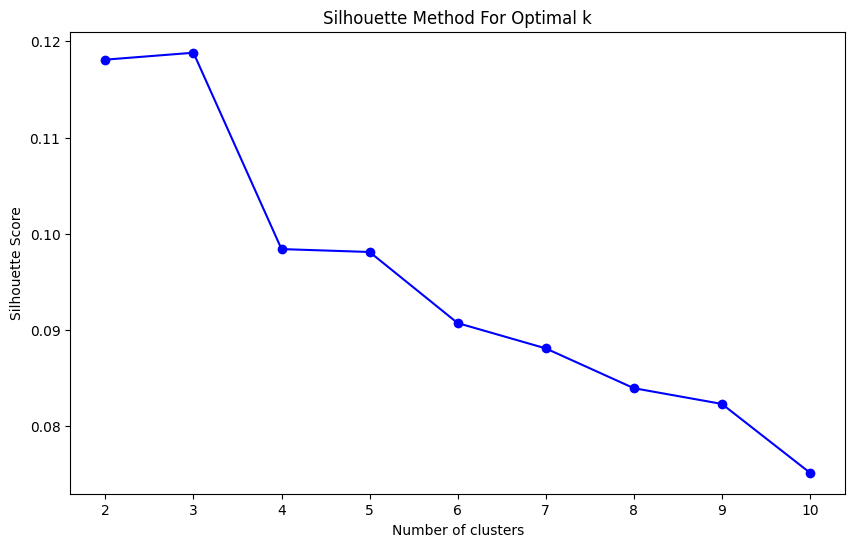

In [123]:


# Silhouette Method for finding the optimal number of clusters
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [124]:

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=42)),
        ("clustering", KMeans(n_clusters=4, random_state=42, n_init=10))
    ]
)

pipeline.fit(df_filtered)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Attrition_Flag']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_on_book',
                                                   'Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Revolving_Bal'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])

In [125]:
df_copy = df_filtered.copy()

In [126]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9313 entries, 5 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9313 non-null   object 
 1   Customer_Age              9313 non-null   int64  
 2   Gender                    9313 non-null   object 
 3   Dependent_count           9313 non-null   int64  
 4   Education_Level           9313 non-null   object 
 5   Marital_Status            9313 non-null   object 
 6   Income_Category           9313 non-null   object 
 7   Card_Category             9313 non-null   object 
 8   Months_on_book            9313 non-null   int64  
 9   Total_Relationship_Count  9313 non-null   int64  
 10  Months_Inactive_12_mon    9313 non-null   int64  
 11  Contacts_Count_12_mon     9313 non-null   int64  
 12  Credit_Limit              9313 non-null   float64
 13  Total_Revolving_Bal       9313 non-null   int64  
 14  Total_Amt_Ch

In [127]:
# Transform the data
X_transformed = pipeline.named_steps["preprocessing"].transform(df_filtered)
X_pca = pipeline.named_steps["pca"].transform(X_transformed)

# Add cluster labels to the data
df_copy['Cluster'] = pipeline.named_steps["clustering"].labels_

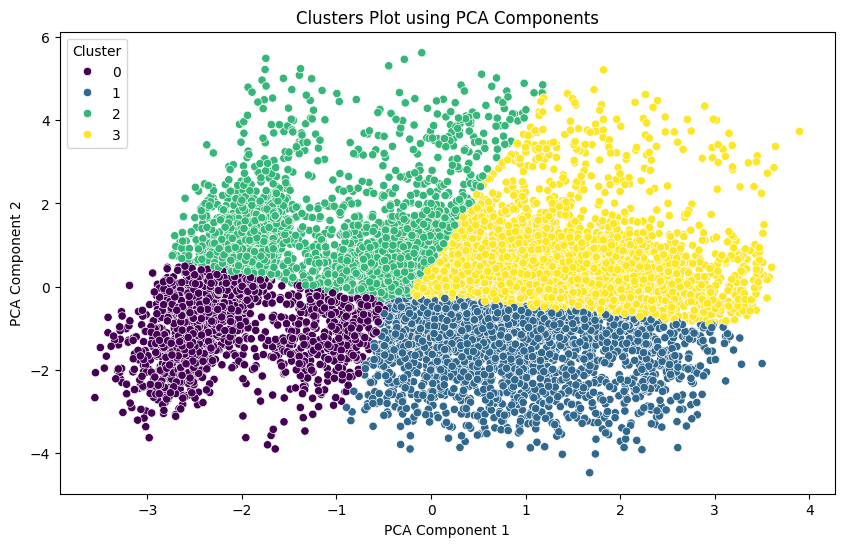

In [128]:
# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_copy['Cluster'], palette='viridis')
plt.title('Clusters Plot using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [129]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9313 entries, 5 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9313 non-null   object 
 1   Customer_Age              9313 non-null   int64  
 2   Gender                    9313 non-null   object 
 3   Dependent_count           9313 non-null   int64  
 4   Education_Level           9313 non-null   object 
 5   Marital_Status            9313 non-null   object 
 6   Income_Category           9313 non-null   object 
 7   Card_Category             9313 non-null   object 
 8   Months_on_book            9313 non-null   int64  
 9   Total_Relationship_Count  9313 non-null   int64  
 10  Months_Inactive_12_mon    9313 non-null   int64  
 11  Contacts_Count_12_mon     9313 non-null   int64  
 12  Credit_Limit              9313 non-null   float64
 13  Total_Revolving_Bal       9313 non-null   int64  
 14  Total_Amt_Ch

In [130]:
df_copy['Cluster'].value_counts()

Cluster
3    3282
2    2330
1    2024
0    1677
Name: count, dtype: int64

In [131]:
categorical_features

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [132]:
numerical_features

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

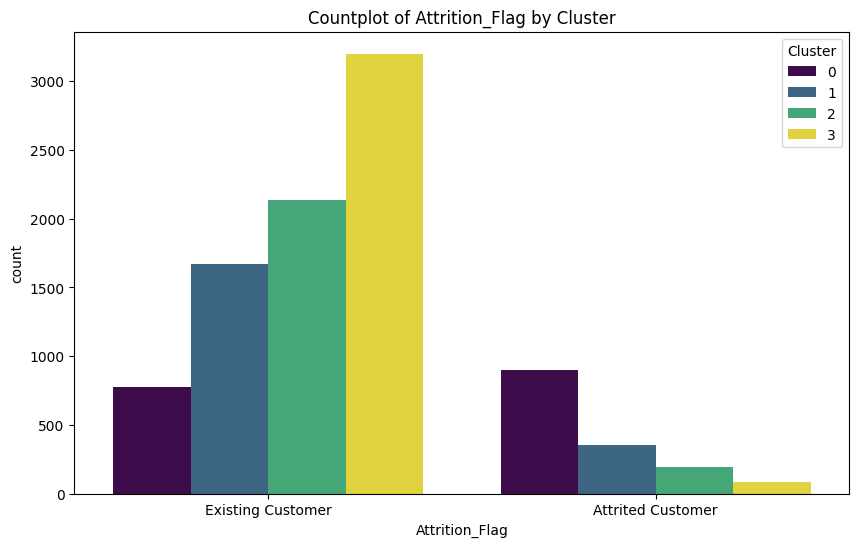

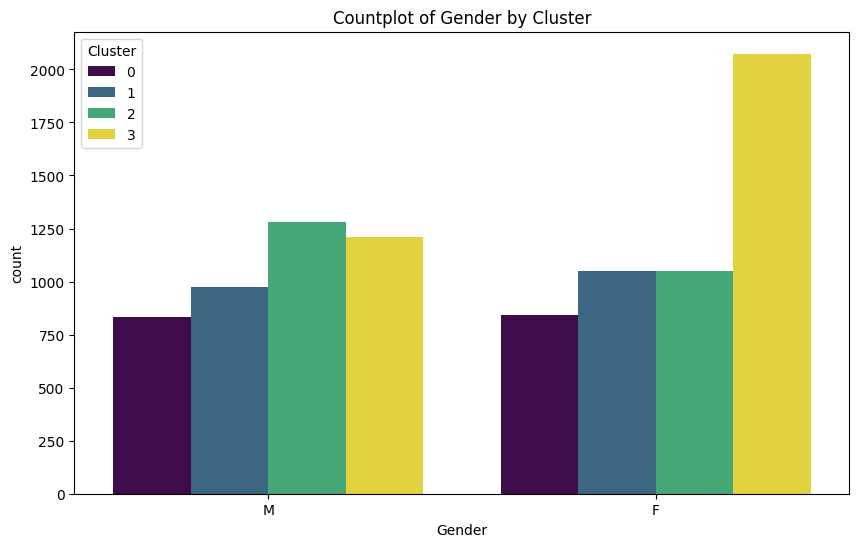

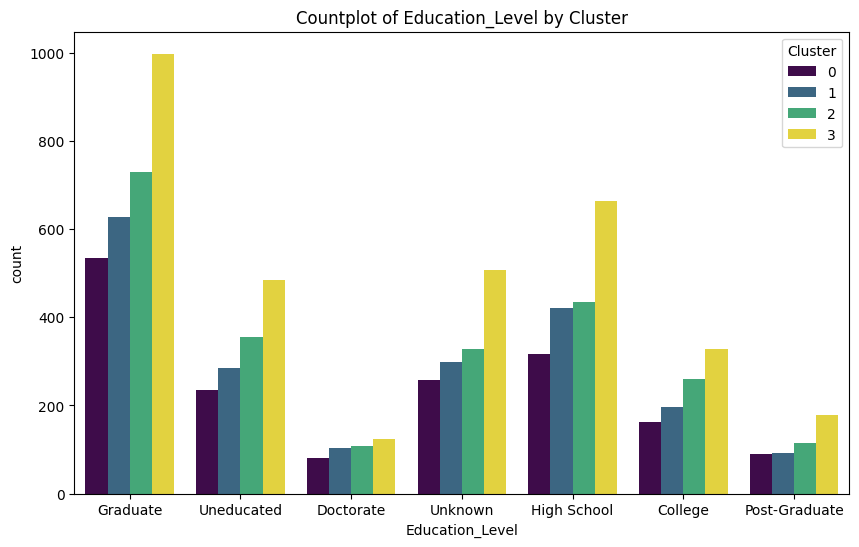

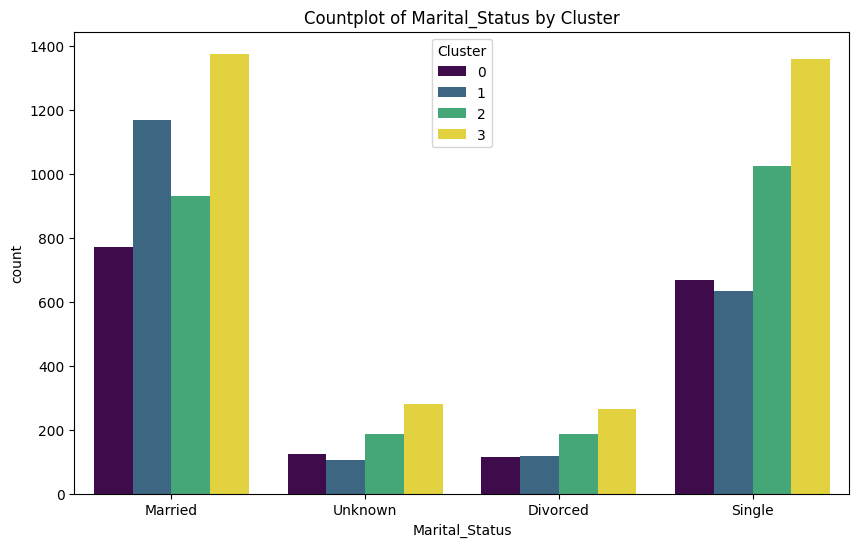

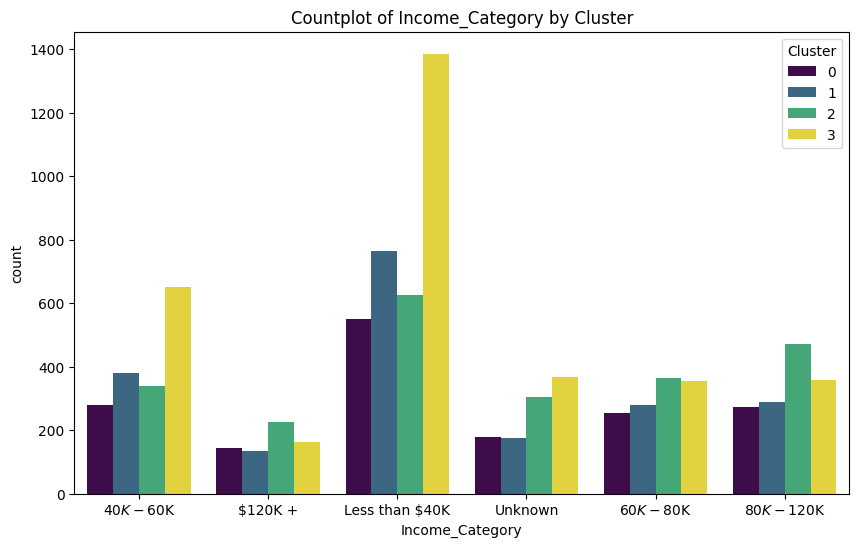

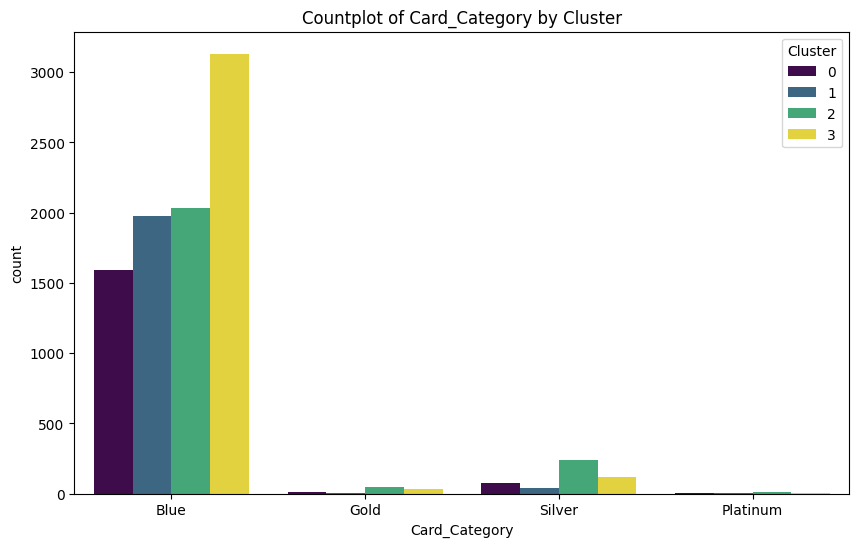

In [133]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Cluster', data=df_copy, palette='viridis')
    plt.title(f'Countplot of {feature} by Cluster')
    plt.show()

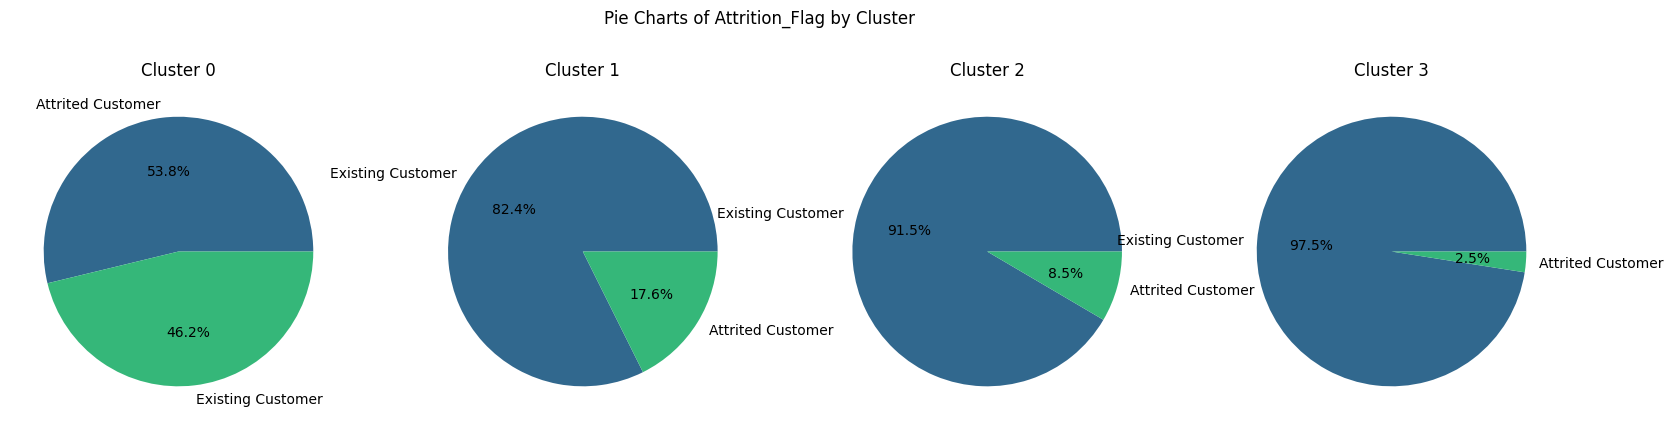

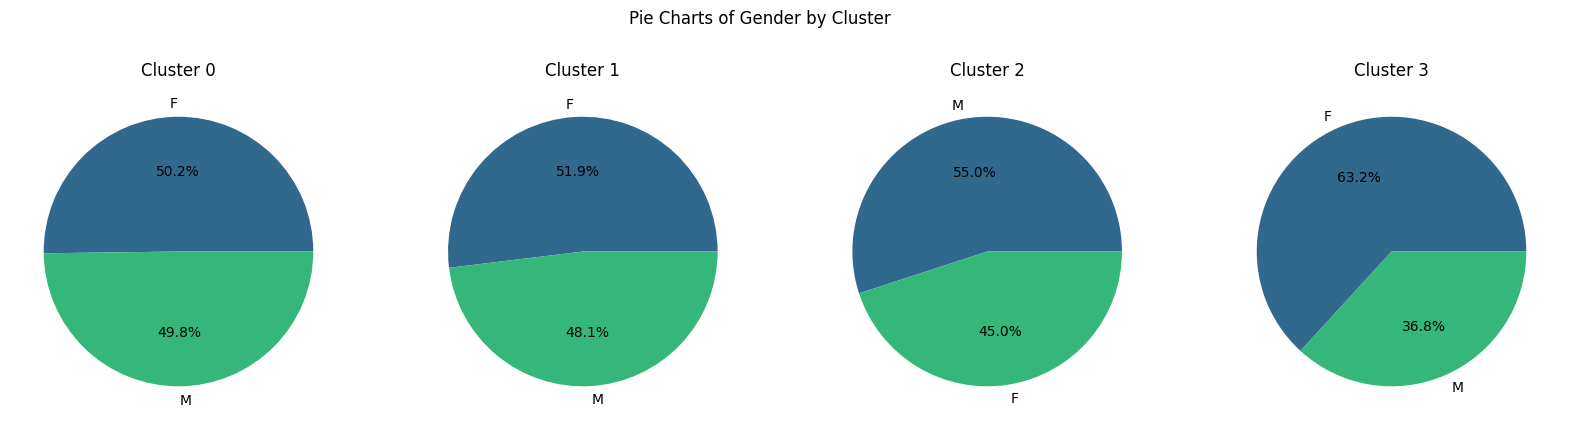

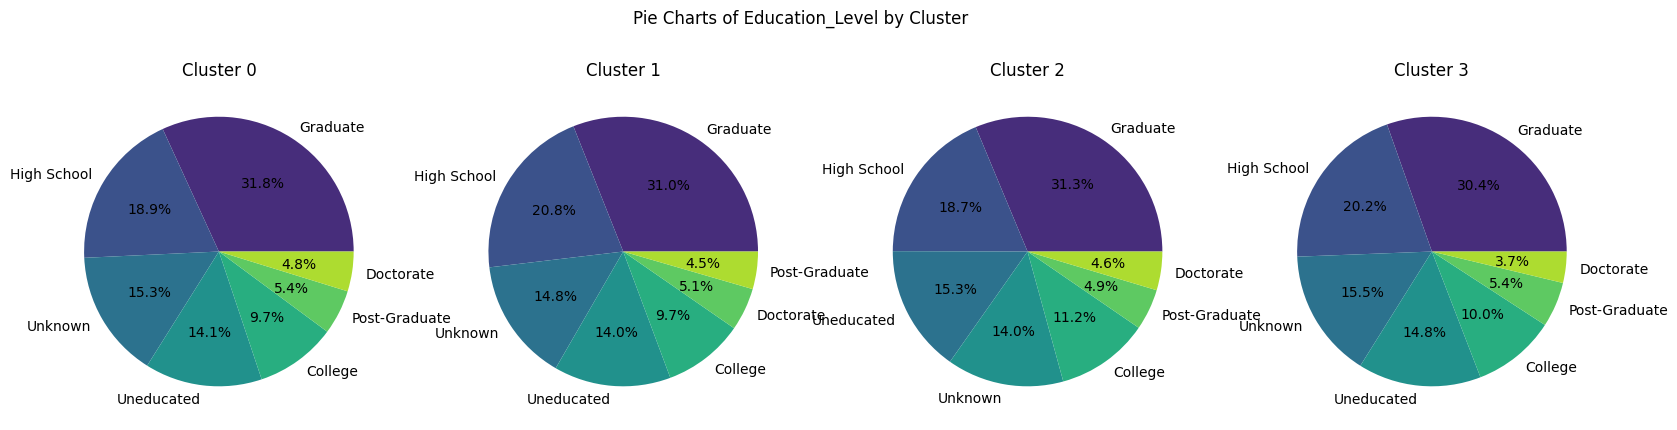

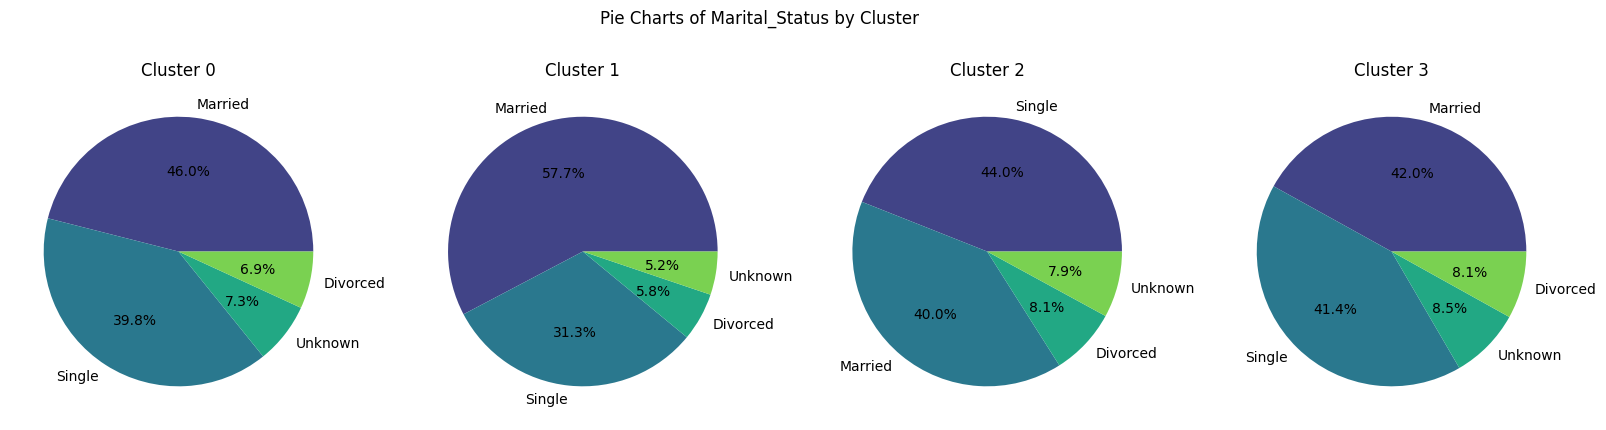

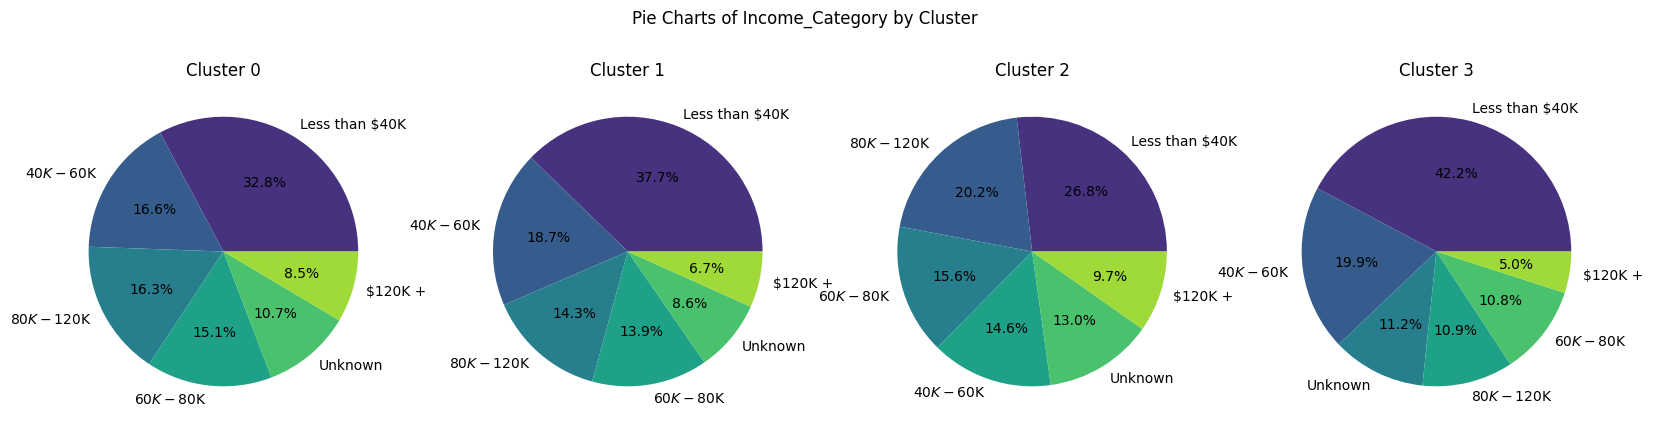

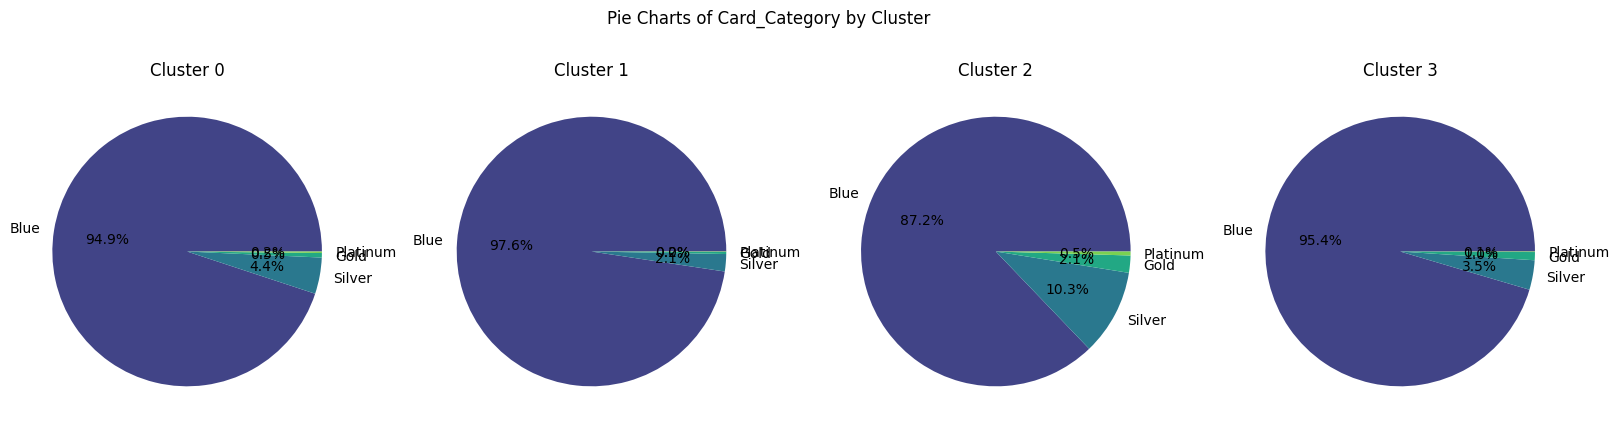

In [134]:
for feature in categorical_features:
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust the number of columns based on the number of clusters
    fig.suptitle(f'Pie Charts of {feature} by Cluster')

    for cluster in range(4):  # Assuming 4 clusters
        cluster_data = df_copy[df_copy['Cluster'] == cluster]
        feature_counts = cluster_data[feature].value_counts()
        axs[cluster].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(feature_counts)))
        axs[cluster].set_title(f'Cluster {cluster}')

    plt.show()

In [135]:
numerical_features

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

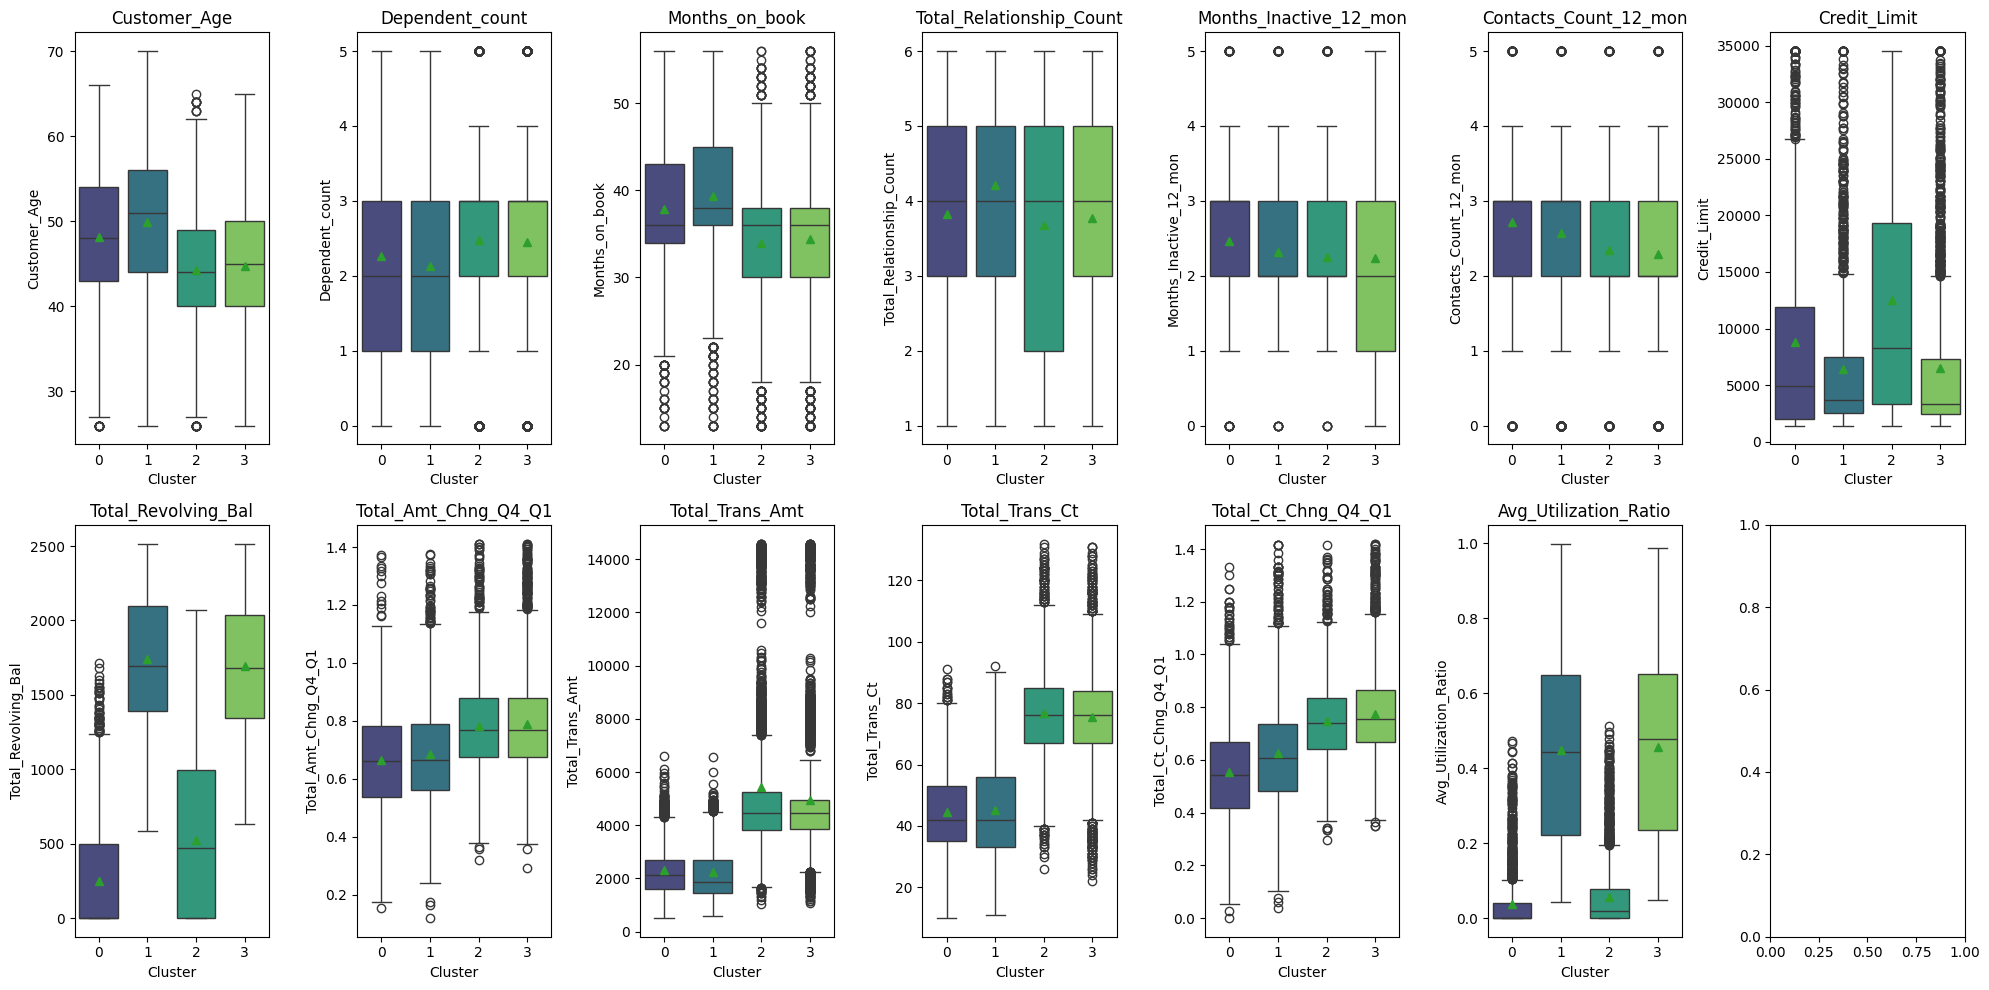

In [136]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10), tight_layout=True)

axs = axs.flatten()

for ax, col in zip(axs, numerical_features):
    sns.boxplot(x="Cluster", y=col, data=df_copy, ax=ax, showmeans=True, palette='viridis')
    ax.set_title(f'{col}')
plt.show()

- Cluster 0 and 1 has more aged customers.
- Cluster 0 and 1 had longer relationship with the credit card.
- Cluster 2 has the highest credit limit
- cluster 1 and 3 has the highest revolving balance
- cluster 2 is more open to buy a credit limit
- cluster 2 and 3 has the highest transaction amount
- cluster 1 nad cluster 3 has the highest utilization ratio

<Figure size 1500x1000 with 0 Axes>

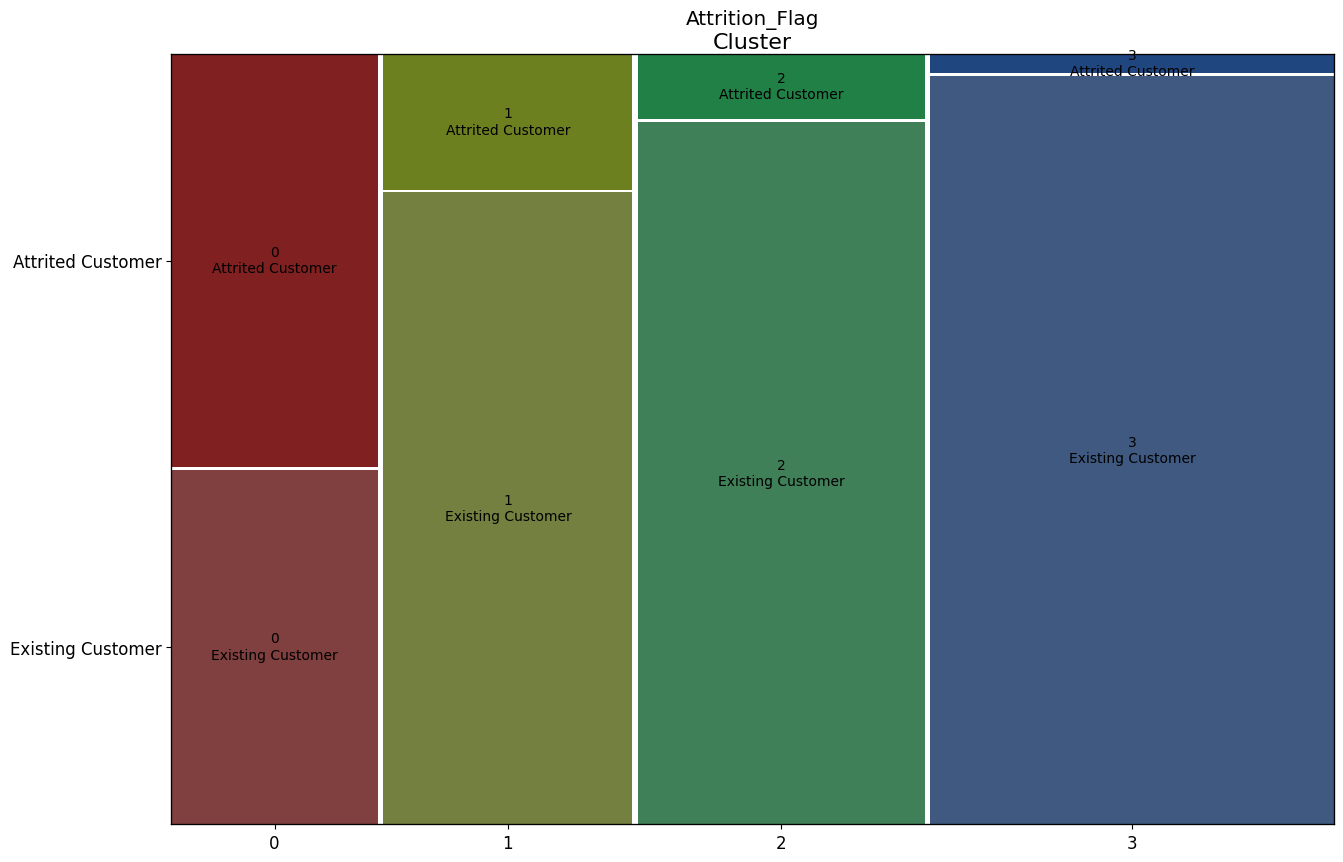

<Figure size 1500x1000 with 0 Axes>

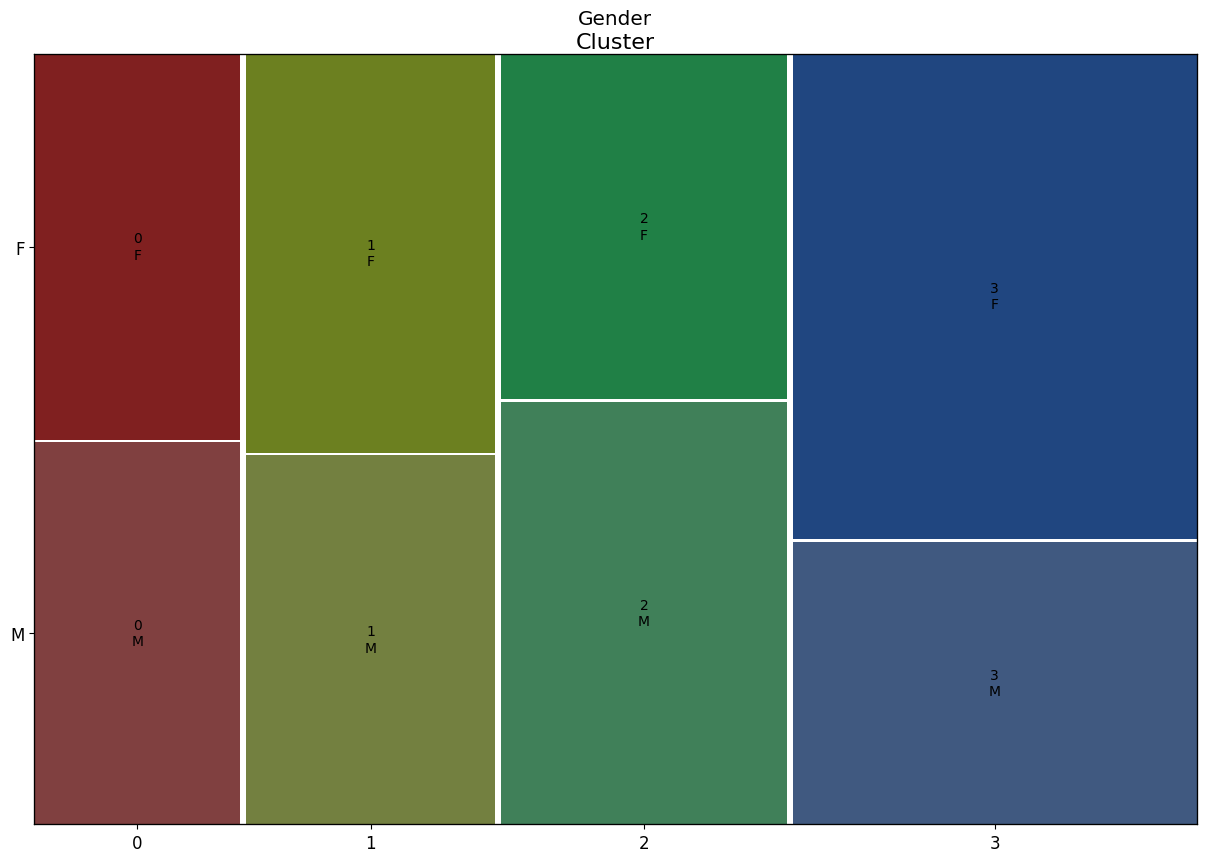

<Figure size 1500x1000 with 0 Axes>

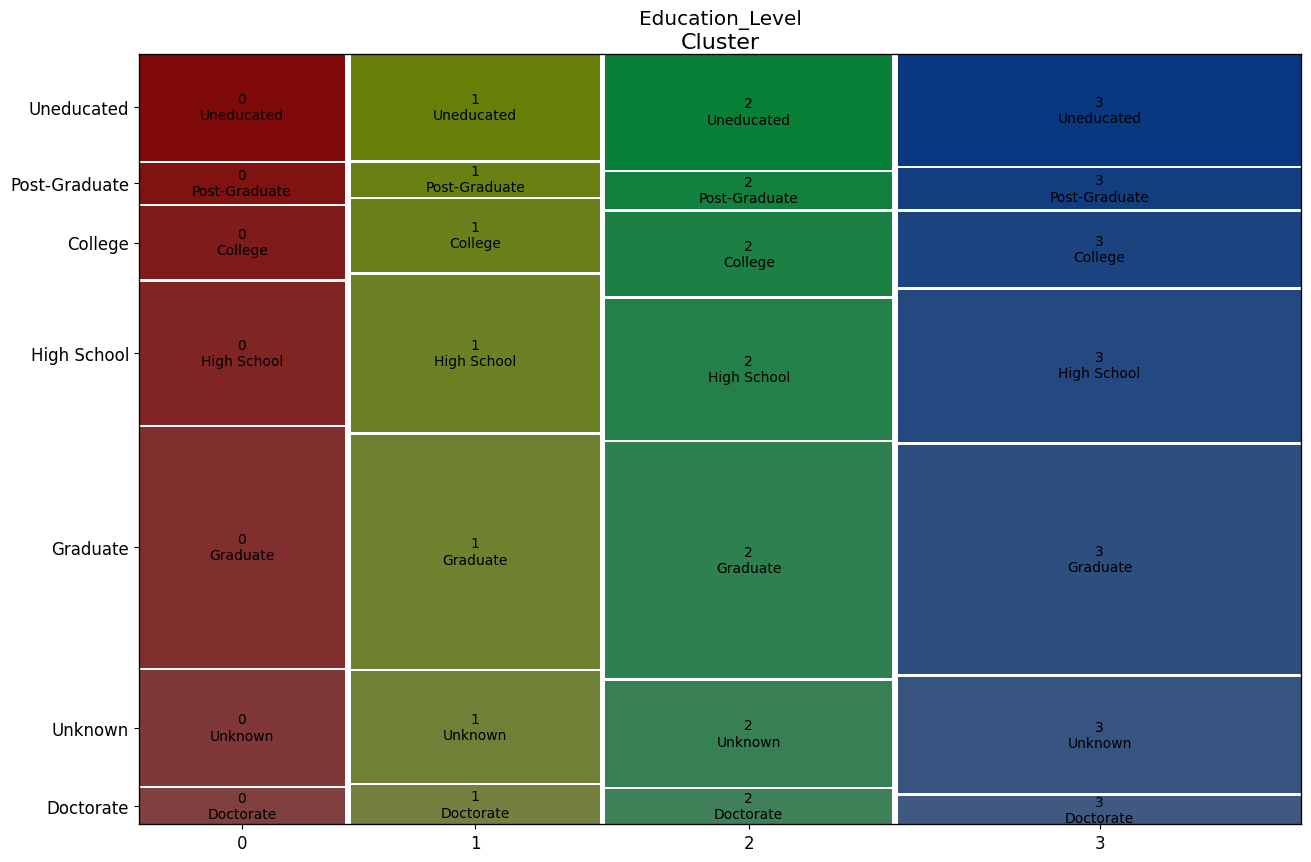

<Figure size 1500x1000 with 0 Axes>

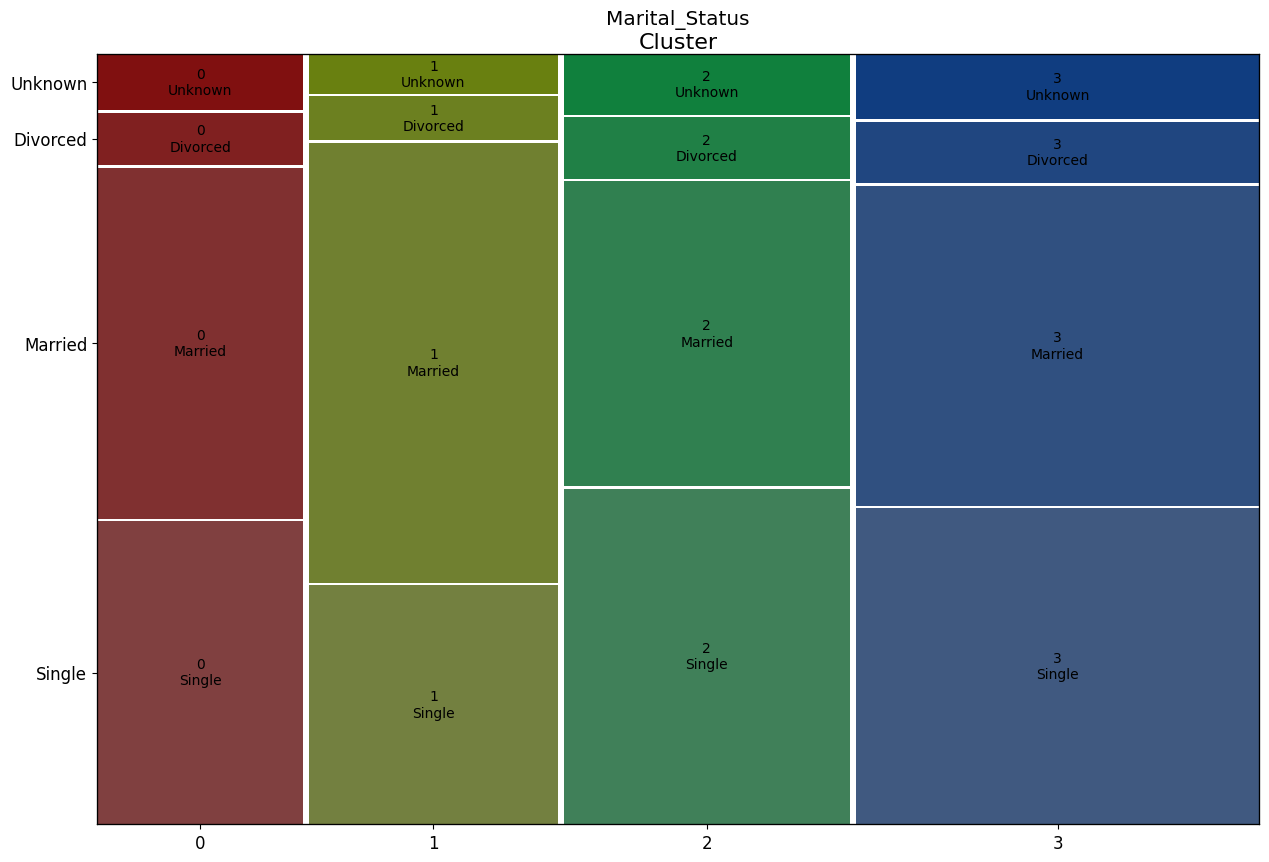

<Figure size 1500x1000 with 0 Axes>

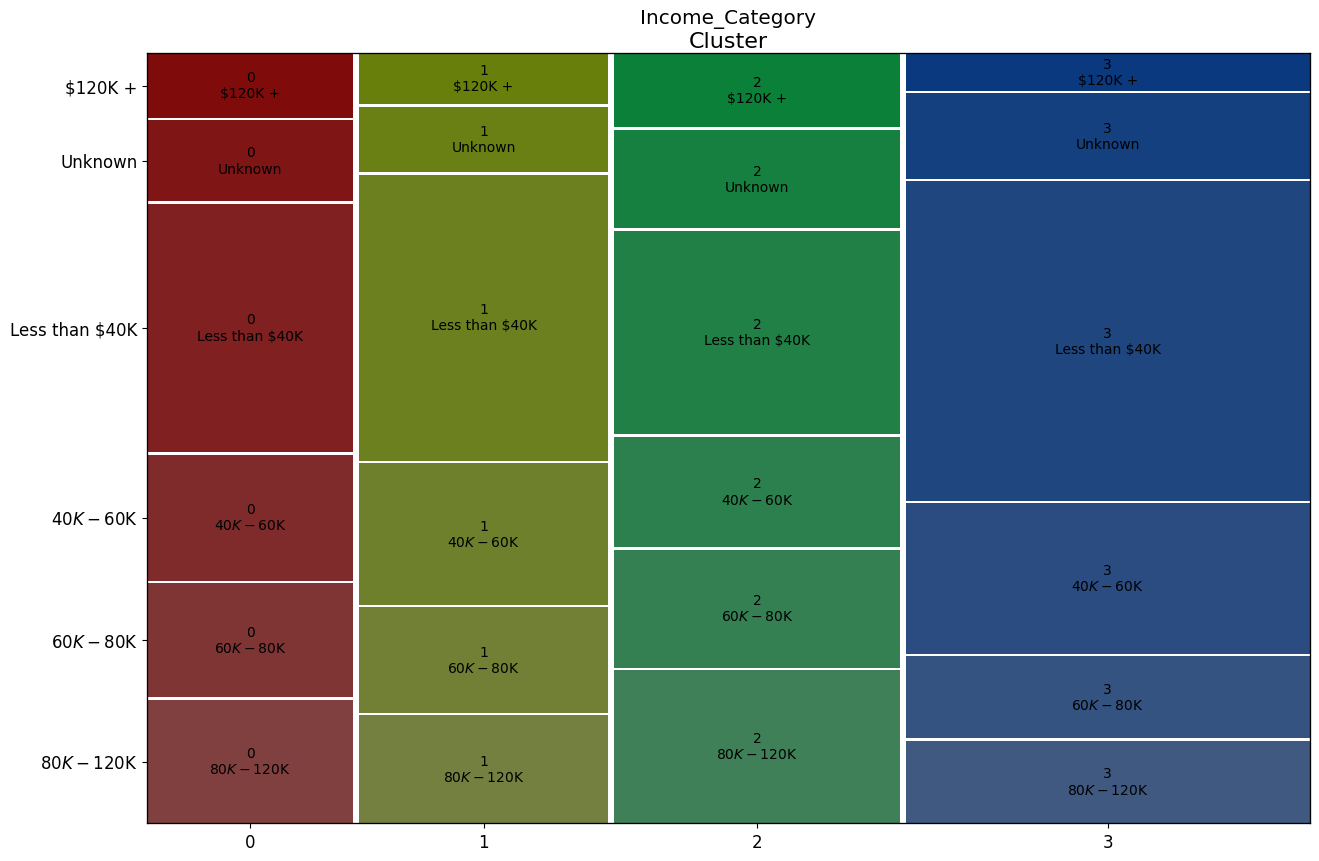

<Figure size 1500x1000 with 0 Axes>

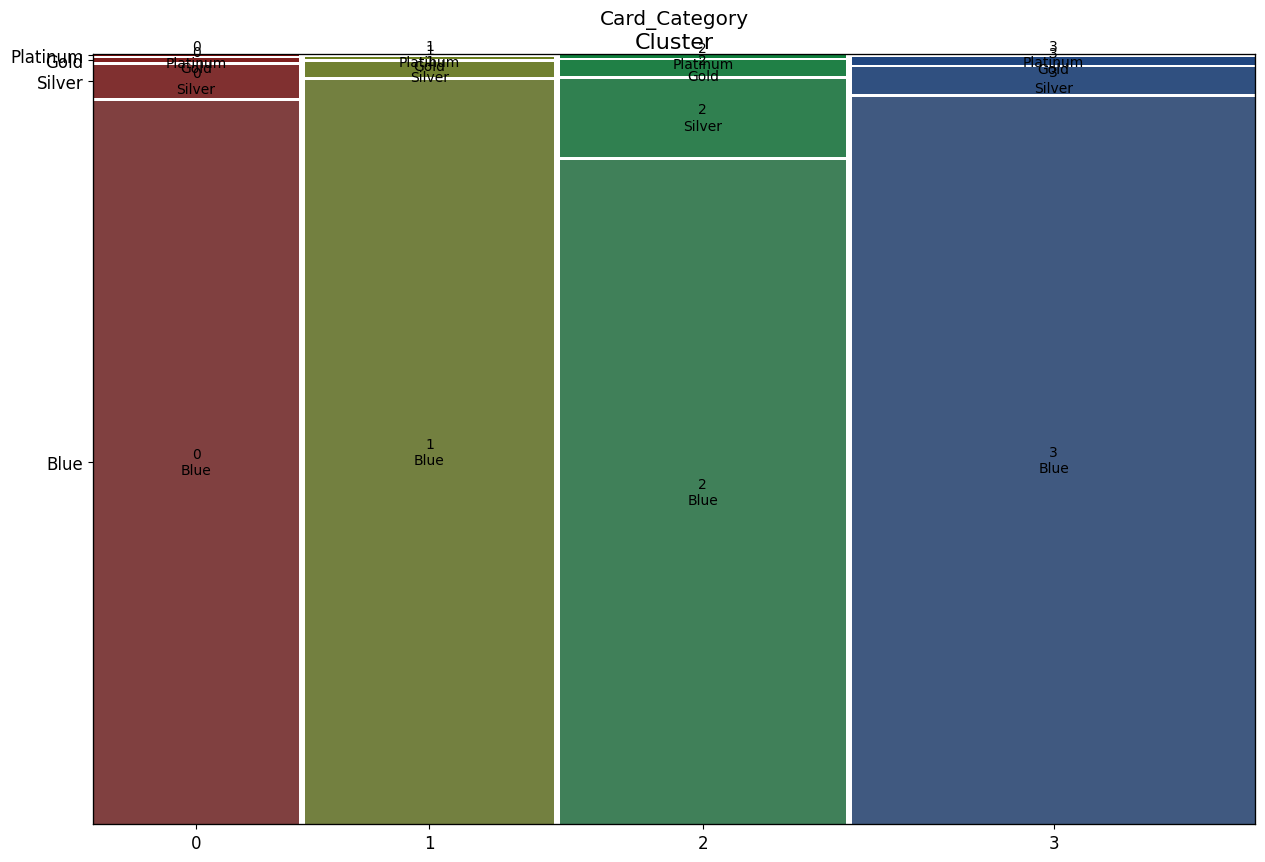

In [137]:
default_rcParams = rcParams.copy()

# Loop through each categorical feature and create mosaic plots
for feature in categorical_features:
    cluster_feature = df_copy[['Cluster', feature]]
    cluster_feature = cluster_feature.sort_values(by='Cluster')

    
    # Adjust plot parameters for better readability
    rcParams['figure.figsize'] = (15, 10)
    rcParams['font.size'] = 12

    # Create mosaic plot
    plt.figure(figsize=(15, 10))
    mosaic(cluster_feature, ['Cluster', feature], title=f'{feature}')
    
    # Adjust text size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Cluster', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.show()

    # Reset plot parameters to default
    rcParams.update(default_rcParams)

From Numerical Columns
- Cluster 0 and 1 has more aged customers.
- Cluster 0 and 1 had longer relationship with the credit card.
- Cluster 2 has the highest credit limit
- cluster 1 and 3 has the highest revolving balance
- cluster 2 is more open to buy a credit limit
- cluster 2 and 3 has the highest transaction amount
- cluster 1 nad cluster 3 has the highest utilization ratio

From categorical columns
- Cluster 0 has the highest attrited customers and cluster 3 has the highest existing customers
- Gender proportion is almost the same in all clusters
- Education level proportion is also the same in all clusters
- Matrital status proportion is also the same in all clusters
- Income category proportion is also the same in all clusters
- Blue card is the highest in all the clusters

# Actionable insights
- Use some retention techniques on cluster 0 customers, like loyalty programs
- Cluster 3 consists of women majorly. They have high revolving balance, hight transaction amounts and hight utilization ratio. Offer them transaction rewards to increase the expenditure. They can be offered debt products.
- Cluster 2 consists of high income customers they can be offered more credit line and more offers.
- Cluster 1 has similar properties like cluster 3 but it doesn't have high transaction amount, probably because they are not high income customers. So don't make any further marketing expenses on this group.

# Predictive Analysis

In [147]:
# Separate features and target
X = df_filtered.drop(columns=["Attrition_Flag"])
y = df_filtered["Attrition_Flag"].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [151]:
one_hot_cols = [
    "Gender", 
    "Education_Level", 
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

standard_cols = [
    "Customer_Age", 
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Months_on_book",
    "Total_Revolving_Bal",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
]

In [152]:
preprocess = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
    ]
)


In [153]:
# Define the logistic regression pipeline
log_reg_pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_on_book',
                                                   'Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Revolving_Bal'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

ROC AUC: 0.93


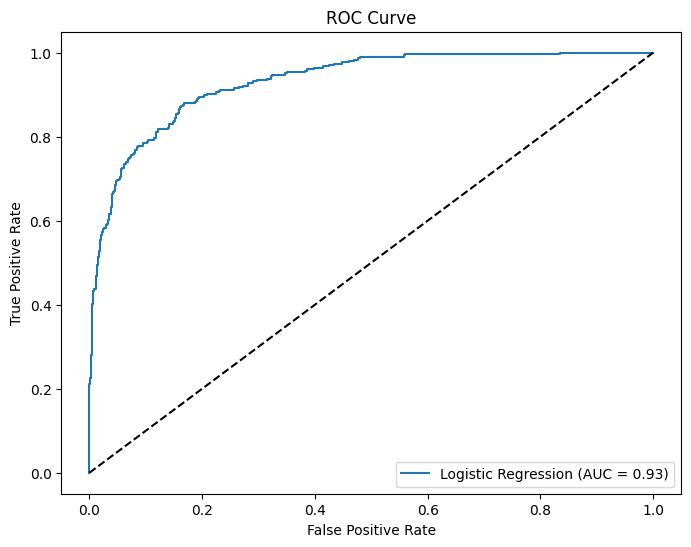

In [154]:
# Predict probabilities
y_pred_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [168]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = [{
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, 30],
}]

rf_cv = GridSearchCV(estimator=rf_pipeline, param_grid=rf_params, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', verbose=3)
rf_cv.fit(X_train, y_train)

rf_best = rf_cv.best_estimator_
print(f'Best Random Forest Params: {rf_cv.best_params_}')


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 1/5] END classifier__max_depth=10, classifier__n_estimators=100;, score=0.983 total time=  11.7s
[CV 2/5] END classifier__max_depth=10, classifier__n_estimators=100;, score=0.976 total time=   6.1s
[CV 3/5] END classifier__max_depth=10, classifier__n_estimators=100;, score=0.979 total time=   5.0s
[CV 4/5] END classifier__max_depth=10, classifier__n_estimators=100;, score=0.976 total time=   5.0s
[CV 5/5] END classifier__max_depth=10, classifier__n_estimators=100;, score=0.969 total time=   4.8s
[CV 1/5] END classifier__max_depth=10, classifier__n_estimators=200;, score=0.984 total time=  14.2s
[CV 2/5] END classifier__max_depth=10, classifier__n_estimators=200;, score=0.976 total time=  15.7s
[CV 3/5] END classifier__max_depth=10, classifier__n_estimators=200;, score=0.977 total time=  10.6s
[CV 4/5] END classifier__max_depth=10, classifier__n_estimators=200;, score=0.979 total time=   8.0s
[CV 5/5] END classifier__max_depth=10, classifier__n_estimators=200;, score=0.971 total tim

In [171]:
xgb_pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01],
}

xgb_cv = GridSearchCV(xgb_pipeline, xgb_params, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', verbose=3)
xgb_cv.fit(X_train, y_train)

xgb_best = xgb_cv.best_estimator_
print(f'Best XGBoost Params: {xgb_cv.best_params_}')


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=0.970 total time=   0.3s
[CV 2/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=0.959 total time=   0.2s
[CV 3/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=0.961 total time=   0.2s
[CV 4/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=0.963 total time=   0.2s
[CV 5/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100;, score=0.946 total time=   0.2s
[CV 1/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200;, score=0.979 total time=   0.5s
[CV 2/5] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200;, score=0.971 total time=   0.4s
[CV 3/5] END cla

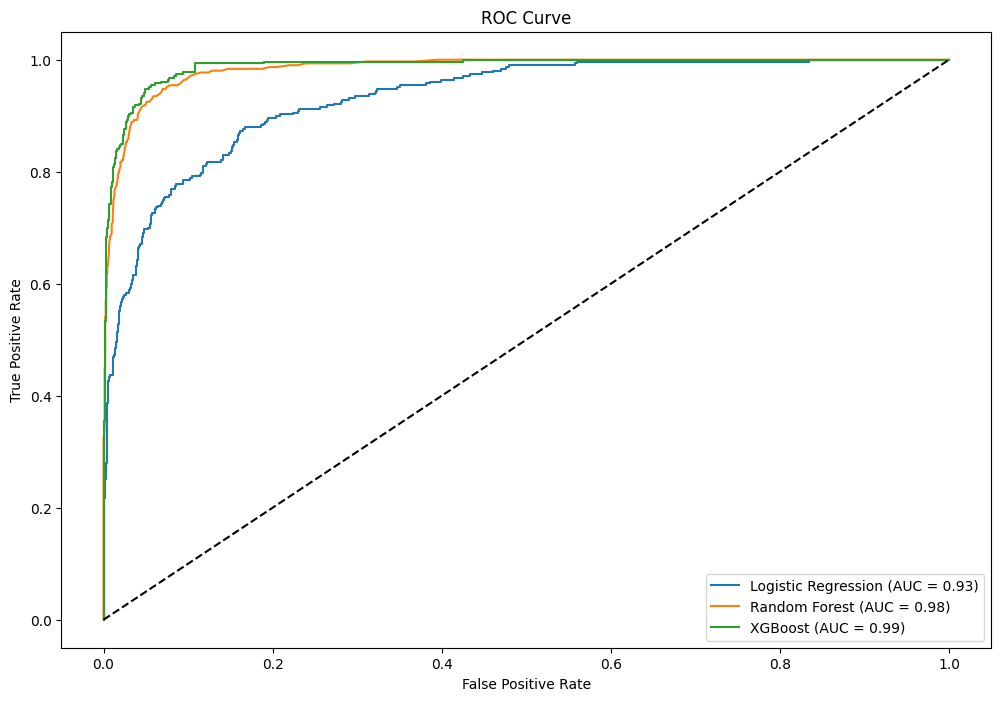

In [172]:
models = {
    'Logistic Regression': log_reg_pipeline,
    'Random Forest': rf_best,
    'XGBoost': xgb_best
}

plt.figure(figsize=(12, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [182]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='turbo', cbar=False)
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


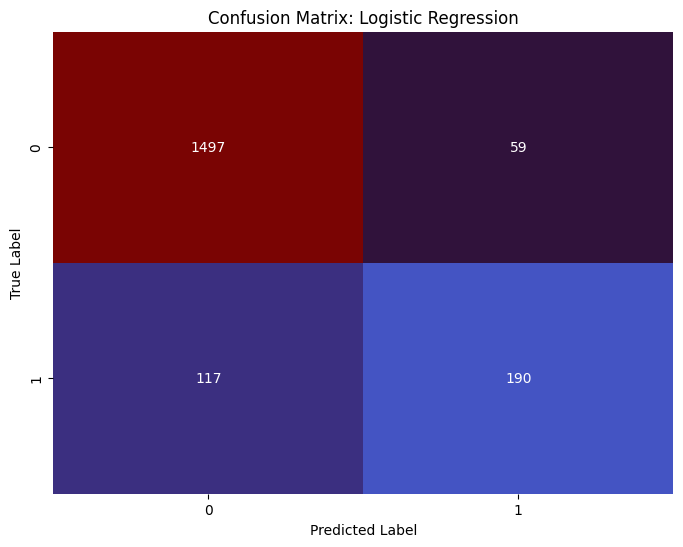

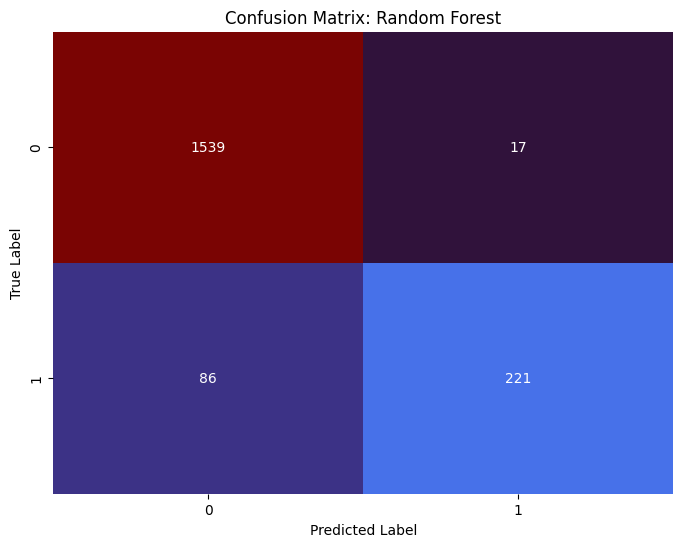

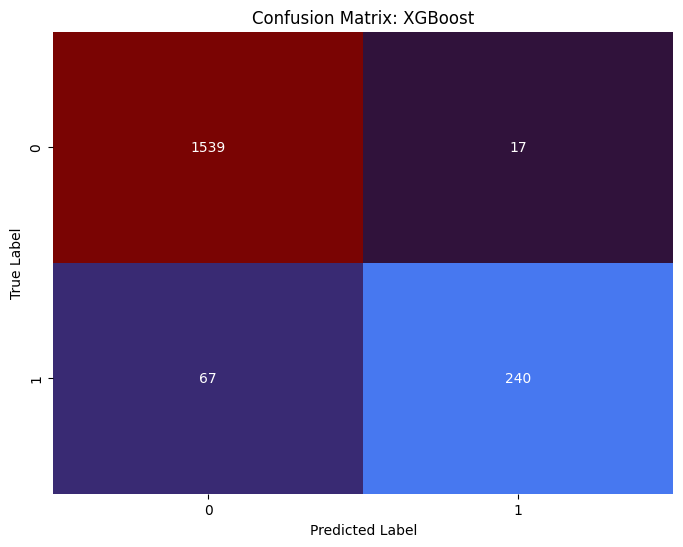

In [183]:
# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(log_reg_pipeline, X_test, y_test, 'Logistic Regression')

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_best, X_test, y_test, 'Random Forest')

# Plot confusion matrix for XGBoost
plot_confusion_matrix(xgb_best, X_test, y_test, 'XGBoost')
